## MCHOBOLOLO NETWORK ANALYSIS (PART II )


In [1]:
#
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
from IPython.display import Image, SVG, display
#import cairosvg
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
import scipy.cluster.vq as vq
import numpy.linalg as la
import matplotlib.colors as color
from operator import itemgetter
import math
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator


import warnings
## — — — — — — to get rid of warning messages
warnings.filterwarnings('ignore') 
## — — — — — — — Remove scientific notations and display numbers with 2 decimal points instead — — — — — — — 
pd.options.display.float_format = '{:,.2f}'.format
## — — — — — — — Update default background style of plots — — — — — — — 
#sns.set_style(style=’darkgrid’)

######################################################################################### 

##PATHS##
#pth=r'\\researchdata.uct.ac.za\LRES\Qualitative\sna-qlr\anon\\'
pth=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\\'
csm=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\csm\\'
pta=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\Mchobololo\\'
cto=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\SurveyCTO\\'
npth = r"C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\net\\"


##SETUP##
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 10)})
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth", None)


##FUNCTIONS##
def set_vertex_community(G, communities):
    G.vs['community'] = communities
    #print(v.index for v in G.vs)
    for v in G.vs.indices:
        #print(v)
        #Add 1 to save 0 for external edges
        G.vs[v]['community'] = G.vs[v]['community']+1
        

def set_edge_community(G):
    #Find internal edges and add their community to their attributes
    #for es in G.get_edgelist():
    for i, e_s in enumerate(G.get_edgelist()):
        #print(i, e_s)
        #for v,w in G.get_edgelist():
        if G.vs[e_s[0]]['community'] == G.vs[e_s[1]]['community']:
            #Internal edge, mark with community
            G.es[i]['community'] = G.vs[e_s[0]]['community']    
        else:
            #External edge, mark as 0
            G.es[i]['community'] = 0    


def set_vertex_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a vertex

    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
    c_rgb = (r,g,b)
    c_hex = color.to_hex(c_rgb)
    return c_hex

def set_edge_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a edge
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
    c_rgb = (r,g,b)
    c_hex = color.to_hex(c_rgb)
    return c_hex

def get_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a vertex
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 10) % n) / (n - 1)
    g = low + span * (((i + g_off) * 8) % n) / (n - 1)
    b = low + span * (((i + b_off) * 6) % n) / (n - 1)
    return(r, g, b)

def set_community_style(G, communities, my_layout,):
    nprando.seed(111)
    #Set node and edge communities
    #set_vertex_community(G, communities)
    #set_edge_community(G)
    #set_vertex_size(G)
    #Set community color for internal edges
    external = [e_s for i, e_s in enumerate(G.get_edgelist()) if G.es[i]['community'] == 0]
    external_color = ['silver' for e in external]
    #internal = [e_s for i, e_s in enumerate(G.get_edgelist()) if G.es[i]['community'] > 0]
    #internal_color = ['black' for e in internal]
    node_color = [get_color(G.vs[v]['community']) for v in G.vs.indices]
    #print(node_color)
    edge_color = [('silver' if e_s in external else get_color(G.vs[e_s[0]]['community'])) for e_s in G_igu.get_edgelist()]
    edge_degree = G.degree(mode='all')
    G_ig.vs['degree'] = edge_degree
    edge_size = list(map(lambda x:2*math.sqrt(x) , edge_degree))
    #print(edge_size)
    visual_style = {}
    #visual_style["vertex_size"] = set_v_size(G)
    visual_style["vertex_size"] = 5
    visual_style["vertex_color"] = node_color
    #visual_style["vertex_label"] = G.vs["label"]
    visual_style["vertex_label"] = None 
    #visual_style["vertex_label_size"] = 1
    #visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    visual_style["edge_curved"] = False
    visual_style["edge_color"] = edge_color
    visual_style["edge_size"] = 0.1
    visual_style["edge_arrow_size"] = 0.3
    visual_style["layout"] = my_layout    
    return visual_style


def set_v_size(G):
    v_size=[]
    for i in range(len(G.degree())):
        v_size.append(G.degree()[i]+8)
  
    return(v_size)
        
def set_v_color(G, m_lst, m):

    m_min = np.amin(m_lst)
    m_avg = np.mean(m_lst)
    m_50 = np.percentile(m_lst,50)
    m_75 = np.percentile(m_lst,75)
    m_90 = np.percentile(m_lst,90)
    m_max = np.amax(m_lst)
    
    v_col = []
    for i in range(len(ig.VertexSeq(G))):

        if G.vs[m][i] >= m_90:
            v_col.append('red')

        elif G.vs[m][i] >= m_75 and G.vs[m][i] < m_90:
            v_col.append('orange')

        elif G.vs[m][i] >= m_avg and G.vs[m][i] < m_75:
            v_col.append('white')

        else:
            v_col.append('white')
    return v_col

def set_style(G, my_layout, m_lst, m):
    #out_fig_name = "graph.eps"
    nprando.seed(111)
    visual_style = {}
    # Set bbox and margin
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    # Set vertex colours
    visual_style["vertex_color"] = set_v_color(G,m_lst, m)
    # Set vertex size
    visual_style["vertex_size"] = list(map(lambda x: x, m_lst))
    visual_style["edge_color"] = 'silver'
    visual_style["edge_size"] = 0.1
    visual_style["edge_arrow_size"] = 0.3
    # Set vertex lable size
    visual_style["vertex_label"] = None 
    # Don't curve the edges
    visual_style["edge_curved"] = False
    # Set the layout
    visual_style["layout"] = my_layout
    return visual_style

def set_style_2(G, my_layout, m_lst, m, c=None, v_col=True, v_siz=True, e_col=True, e_siz=True):
    #out_fig_name = "graph.eps"
    nprando.seed(111)
    visual_style = {}
    # Set bbox and margin
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    # Set vertex colours
    if v_col==True:
        if c==None:
            visual_style["vertex_color"] = set_v_color(G,m_lst, m)  
            #visual_style["vertex_color"] = [int(i * 255/ max(m_lst)) for i in m_lst]
        else:
            visual_style["vertex_color"] = [get_color(G.vs[v][c]) for v in G.vs.indices]
    # Set vertex size
    if v_siz==True:
        visual_style["vertex_size"] = list(map(lambda x: x, m_lst))
    if e_col==True:
        visual_style["edge_color"] = 'silver'
    if e_siz==True:
        visual_style["edge_size"] = 0.1
    #visual_style["edge_arrow_size"] = 0.3
    # Set vertex lable size
    visual_style["vertex_label"] = None 
    # Don't curve the edges
    visual_style["edge_curved"] = False
    # Set the layout
    visual_style["layout"] = my_layout
    return visual_style

def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

def _calculate_sf(G):
        """
        Calculating the features of a graph.

        Arg types:
            * **graph** *(NetworkX graph)* - A graph to be embedded.

        Return types:
            * **embedding** *(Numpy array)* - The embedding of a single graph.
        """
        number_of_nodes = G.number_of_nodes()
        L_tilde = nx.normalized_laplacian_matrix(G, nodelist=nx.nodes(G))
        dimensions = L_tilde.ndim # L_tilde.shape
        if number_of_nodes <= dimensions:
            embedding = sp.sparse.linalg.eigsh(L_tilde, k=number_of_nodes-1, which='LM',
                              ncv=10*dimensions, return_eigenvectors=False)

            shape_diff = dimensions - embedding.shape[0] - 1
            embedding = np.pad(embedding, (1, shape_diff), 'constant', constant_values=0)
        else:
            embedding = sp.sparse.linalg.eigsh(L_tilde, k=dimensions, which='LM',
                              ncv=10*dimensions, return_eigenvectors=False)
        return embedding

sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)

##CANVAS VARIABLES##
e_edge = "snaderived_edgeMchobololo.csv"
e_node = "snaderived_nodeMchobololo.csv"

##CTO VARIABLES##


######################################################################################### 
##NODE DATA##
df_node = pd.read_csv(npth + e_node, sep=",", usecols=['id', 'label', 'rumour.node', 'cashopt.node', 'landopt.node', 'inoption.node', 'incommittee.node'], dtype={"id":str}, na_values=np.nan)
df_edge = pd.read_csv(npth + e_edge, sep=",", dtype={"source":str})


#### Data

In [2]:
#
print("\n"  + '\033[1m' + 'Data Description' + '\033[0m')
#LOAD NODE DATA##
#print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'Node Attr:' + "\n")
#df_node.info()
#print(df_node.info())
#print("\n" + '\033[1m' + 'Nodelist Description:' + '\033[0m' + "\n")
#print(df_node_1.info())
#print("\n" + "--------" + "\n" + '\033[1m' + 'Nodelist Summary Statistics:' + '\033[0m' + "\n")
#print("--------")
#print(df_node_1.describe())
#print(df_node.head(10))
##LOAD EDGE DATA##
#print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'Edge List' + "\n")
#print(df_edge.info())
#df_edge = df_edge.rename(columns={"source": "source_", 'target':"target_"})
#print(df_edge['other_leader'].describe()) 
df_edge = df_edge.loc[df_edge["other_leader"]!=1]
#df_edge = df_edge.loc[df_edge['claimant']==1]
#df_edge.info()
#print("\n" + '\033[1m' + 'Edgelist Description:' + '\033[0m' + "\n")
#print(df_edge_1.info())
#print("\n" + "--------" + "\n" + '\033[1m' + 'Edgelist Summary Statistics:' + '\033[0m' + "\n")
#print("--------")
#print(df_edge_1['weight'].sum())

# CONVERT TO DIRECTED IGRAPH
print("\n"  + '\033[1m' + 'Igraph' + '\033[0m')
print("--------")
print('\033[1m' + 'Directed Graph' + '\033[0m')
G_ig=ig.Graph.DictList(df_node[['id']].to_dict('records'), df_edge.to_dict('records'), directed=True, vertex_name_attr='id', edge_foreign_keys=('source', 'target'))
G_ig.delete_vertices(G_ig.vs(_degree_eq=0))
#G_ig=ig.Graph.DataFrame(df_edge, directed=True, vertices=df_node, use_vids=False )
#print(ig.summary(G_ig))
print("Nodes: " + str(G_ig.vcount()))
print("Edges: " + str(G_ig.ecount()))
#edge_degree = G_ig.degree(mode='all')
#G_ig.vs['degree'] = edge_degree
#print(ig.summary(G_ig))
#print(G_ig)
##CONVERT TO UNDIRECTED IGRAPH
print('\033[1m' + 'Undirected Graph' + '\033[0m')
G_igu=ig.Graph.DictList(df_node[['id']].to_dict('records'), df_edge.to_dict('records'), directed=False, vertex_name_attr='id', edge_foreign_keys=('source', 'target'))
G_igu.simplify(multiple=True, loops=True, combine_edges=(dict(source='first', target='first', weight=sum)))
G_igu.delete_vertices(G_igu.vs(_degree_eq=0))
print("Nodes: " + str(G_igu.vcount()))
print("Edges: " + str(G_igu.ecount()))
d_lst = G_igu.degree(mode='all')
G_igu.vs['degree'] = d_lst
#remove selfloops
#df_edge.drop(df_edge.loc[df_edge['source']==df_edge['target']].index, inplace=True)
#print(len(df_edge)) #2927 #2044 #20519 #145
#Find Giant Component
#print("--------")
#print('\033[1m' + 'Directed Graph - Connected Components' + '\033[0m')
#print("Components: " + str(len(G_ig.connected_components(mode="weak"))))
#print('\033[1m' + 'Directed Graph - Giant Component' + '\033[0m')
G_ig.is_connected(mode='weak')
#print(len(G_ig.connected_components(mode="weak")))
G_ig_1 = G_ig.connected_components(mode="weak").giant()
G_igu_1 = G_igu.connected_components(mode="weak").giant()
#print(ig.summary(G_ig_1))
#print("Nodes: " + str(G_ig_1.vcount()))
#print("Edges: " + str(G_ig_1.ecount()))

# CONVERT TO DIRECTED NETWORK X
G_nx = G_ig.to_networkx()
G_nxu = G_igu.to_networkx()
Gcc = max(nx.connected_components(G_nxu), key=len)
G_nxu_1 = G_nxu.subgraph(Gcc)


print("------------------------"+ "\n" )


Data Description

Igraph
--------
Directed Graph
Nodes: 40
Edges: 69
Undirected Graph
Nodes: 40
Edges: 63
------------------------



#### Method


This section uses pythons iGraph library and NetworkX library to describe the network by applying **vertex partitioning**, **community detection**, and **spectral clustering** methods. 

#### Analysis

------------------------------------------------------------------

#### 1. VERTEX PARTITIONING




##### 1.1. Detection


**K-Cores**


--------
K-Core Network:
Node colour: k-cores (3)


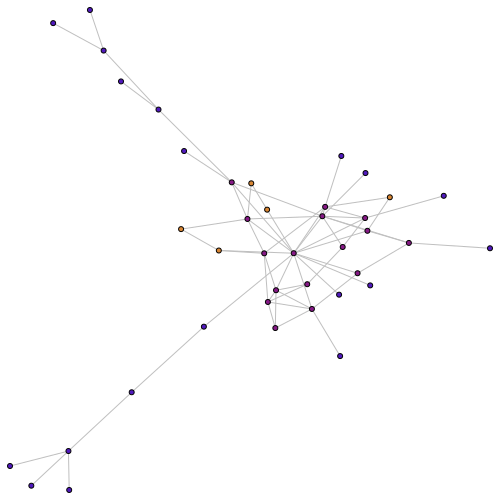

In [3]:
#Coreness
#print("\n" + "--------" + "\n" + '\033[1m' + 'K-Cores:' + '\033[0m')
core_list = G_igu.coreness(mode='all')
G_igu.vs['kcore'] = core_list
#print("K-Cores:", set(core_list))


print("\n" + "--------" + "\n" + '\033[1m' + 'K-Core Network:' + '\033[0m')
print("Node colour: k-cores (3)")
random.seed(1234)
#color_dict = {1: 'white', 2:  'purple', 3: 'blue', 4: 'green', 5: 'yellow', 6: 'red'}
#ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'kcore', False, False), vertex_color=[color_dict[comp] for comp in G_igu.vs["kcore"]], vertex_size = 5)
out=ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'kcore', True, False),  vertex_size = 5)
out.save(pta + "mchobololo_core.png")
Image(filename=pta + "mchobololo_core.png",  width = "400")


**Cliques**


--------
Clique Network:
Node colour: largest cliques (4)


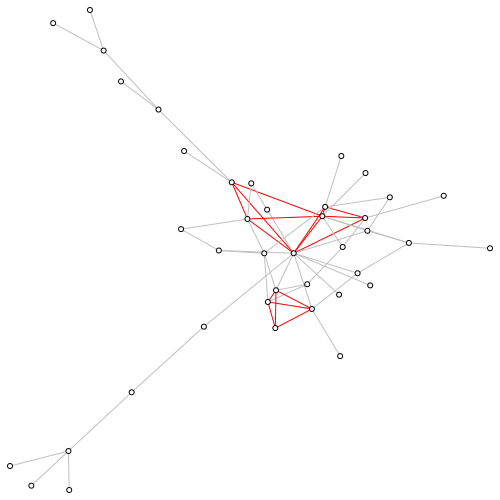

In [4]:
#Clique
#print("\n" + "--------" + "\n" + '\033[1m' + 'Cliques:' + '\033[0m')
cliqs = G_igu.cliques(min=3, max=0)
#print("Number cliques:",len(cliqs))
#print("Largest cliques:", G_igu.clique_number())
max_cliqs = G_igu.largest_cliques()
#print(max_cliqs)
#print("Largest cliques ratio:", len(max_cliqs)/len(cliqs))
#largest cliques of size four make about 6% of total cliques in the network


cliq_set = set([(i,j) for c in max_cliqs for i in c for j in c if i != j])
#print(cliq_set)

#print('----')
#print(G_igu.get_edgelist())

cliq_lst =[]
for i, e_s in enumerate(G_igu.get_edgelist()):
    if e_s in cliq_set:
        G_igu.es[i]['clique'] = 1 
    else:
        #External edge, mark as 0
        G_igu.es[i]['clique'] = 0 
        
external = [e_s for i, e_s in enumerate(G_igu.get_edgelist()) if G_igu.es[i]['clique'] == 0]
internal = [e_s for i, e_s in enumerate(G_igu.get_edgelist()) if G_igu.es[i]['clique'] == 1]
edge_color = [('silver' if e_s in external else 'red') for e_s in G_igu.get_edgelist() ]
print("\n" + "--------" + "\n" + '\033[1m' + 'Clique Network:' + '\033[0m')
print("Node colour: largest cliques (4)")
random.seed(1234)
out=ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'clique', False, False, False, False), vertex_color="white", vertex_size = 5, edge_color=edge_color, edge_size=0.3)
out.save(pta + "mchobololo_clique.png")
Image(filename=pta + "mchobololo_clique.png",  width = "400")

-----------------------------------------------------
#### 2. COMMUNITY DETECTION

##### 2.1. Detection



Setting gamma = 0.7, we detect 5 communities with a modularity of 0.5. The detected communities are visualised below along with descriptions of the top 3 largest communities (by degree).

In [5]:
#
#COMMUNITY SELECTION
nprando.seed(1234)
#print("\n" + '\033[1m' + "Leiden (Optimum)" + '\033[0m')
#print("\n"+"--------"+"\n"+)
gamma=0.7
random.seed(1234)
optimum_clust = G_igu.community_leiden( objective_function='modularity', n_iterations = 100, resolution_parameter=gamma) #1 #0.6 #0.05 #0.01
print("\n"+"--------"+"\n"+'\033[1m' + 'Communinities:' + '\033[0m')
print(len(optimum_clust)) #39 #34
optimum_mem = optimum_clust.membership
optimum_mod = G_igu.modularity(optimum_mem)
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(optimum_mod) #0.8523986065565808 #0.8441848638707548
#print("\n--------")
#G_ig.vs['optimum_ld'] = optimum_mem


--------
Communinities:
5

Modularity:
0.49634668682287736



--------
Community Network:
Group colour: communities (5)


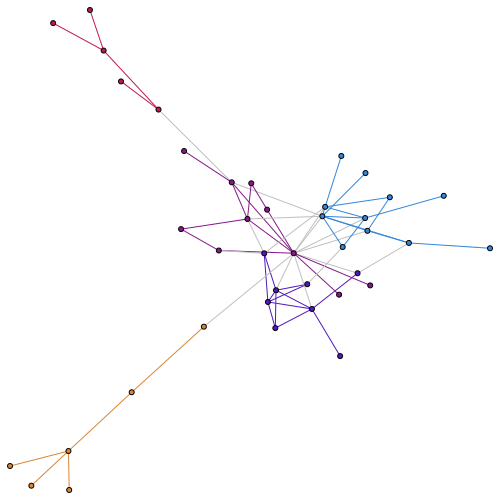

In [6]:
#
#Leiden (Optimal) Plot
set_vertex_community(G_igu, optimum_mem)
G_igu.vs['community_op'] = G_igu.vs['community']
set_edge_community(G_igu)
G_igu.es['community_op'] = G_igu.es['community']
vcolor_lst = [set_vertex_color(G_igu.vs[v]['community_op']) for v in G_igu.vs.indices]
G_igu.vs['hex_op'] = vcolor_lst
ecolor_lst = [set_edge_color(G_igu.es[i]['community_op']) for i, e_s in enumerate(G_igu.get_edgelist())]
G_igu.es['hex_op'] = ecolor_lst

#display(SVG(filename="senekal_comm_op_1_3.svg"))

print("\n" + "--------" + "\n" + '\033[1m' + 'Community Network:' + '\033[0m')
print("Group colour: communities (5)")
random.seed(1234)
out=ig.plot(G_igu, **set_community_style(G_igu, 'community',G_igu.layout_fruchterman_reingold()))
out.save(pta + "mchobololo_community.png")
Image(filename=pta + "mchobololo_community.png",  width = "400")

In [7]:
#print(optimum_clust)

#########################################################################################
siz_c_lst = []
tot_deg_c_lst = []
for i in range(0,len(optimum_clust)):
    op_lst = optimum_clust[i]
    #size
    siz_c = len(op_lst)
    siz_c_lst.append(siz_c)
    #print(siz_c_lst)
    deg_c_lst = []
    for v in op_lst:
        # degree
        deg_c = G_igu.vs[v]['degree']
        deg_c_lst.append(deg_c)
        #print(siz_c_lst)
        #print(den_c_lst)
        #print(deg_c_lst)

    tot_deg_c = np.sum(deg_c_lst)
    tot_deg_c_lst.append(tot_deg_c)
    #print(tot_deg_c_lst)
    max_siz_c = sort_index(siz_c_lst)
    max_deg_c = sort_index(tot_deg_c_lst)
    #print(max_deg_c)
    #print(sort_index(siz_c_lst))
    #print(sort_index(den_c_lst))
    #print(sort_index(deg_c_lst))


print("\n" + "--------" + "\n" + '\033[1m' + "Top 3 Degree Communities: "  +  '\033[0m')
#print("--------------------------------")
for i, c in enumerate(max_deg_c[:3]):
    com_ = c+1
    #com1 = G_ig.vs.select(label="PieterDuToit")["community_op"]
    print("--------------------------------")
    print("\n" + "--------" + "\n" + '\033[1m' + "Community " + str(i+1) + ":" + '\033[0m')
    print("--------")
    #print("Community " + str(i+1))
    #print("--------------------------------")
    print("\n" + '\033[1m' +"Member Size:" + '\033[0m') 
    print(siz_c_lst[c])
    #print("\n" + '\033[1m' +"Member Aggregate Degree:" + '\033[0m')
    #print(int(tot_deg_c_lst[c]))
    print("\n" + '\033[1m' +"Top 3 Member ID*:" + '\033[0m')
    #print([v for v in G_igu.vs.select(community_op=1)])
    for i, v1 in enumerate(sorted(G_igu.vs.select(community_op=com_), key=lambda x:x['degree'], reverse=True)[:3]):
        print(i, v1["id"])

#print("\n" + "--------") 




print("--------------------------------")
print("*Top 3 highest degree in community.")



--------
Top 3 Degree Communities: 
--------------------------------

--------
Community 1:
--------

Member Size:
10

Top 3 Member ID*:
0 706.0
1 767.0
2 707.0
--------------------------------

--------
Community 2:
--------

Member Size:
11

Top 3 Member ID*:
0 718.0
1 722.0
2 715.0
--------------------------------

--------
Community 3:
--------

Member Size:
8

Top 3 Member ID*:
0 703.0
1 705.0
2 702.0
--------------------------------
*Top 3 highest degree in community.


In [8]:
G_igu.write_graphml("Mchobololo.graphml")

#Vertex attributes
df_vcomm = G_igu.get_vertex_dataframe()
#df_vcomm.info()
#df_vcomm = df_vcomm.loc[:,['id','label','degree','community_op','hex_op']]
df_vcomm.to_csv(pta + "Mchobololo_vcomm.csv", sep=";",encoding='utf-8',  index=False)

#Edge attributes
df_ecomm = G_igu.get_edge_dataframe()
#df_ecomm.info()
df_ecomm = df_ecomm.iloc[:,2:9]
#df_ecomm.info()
#print(df_ecomm.head(10))
#df_ecomm.set_index(['source', 'target'], inplace=True)
df_ecomm.to_csv(pta + "Mchobololo_ecomm.csv", sep=";",encoding='utf-8',  index=False)



##### 2.2. Evaluation


Using various pair counting scores, we compare community outcomes from the leiden procedure to the louvain method. 


In [9]:
#Louvain Method
nprando.seed(1234)
print("\n" + "--------" + "\n" + '\033[1m' + 'Louvain Method:' + '\033[0m')
ig_louvain_clust = G_igu.community_multilevel()
#print("\n" + '\033[1m' + "Stats" + '\033[0m')
print("--------\n")
print('\033[1m' + 'Communinities:' + '\033[0m')
print(len(ig_louvain_clust)) #42 #38 #39 #10
#ig_louvain_hist = ig_louvain_clust.size_histogram
#ig.plot(ig_louvain_hist,"{}".format(gpath) + x + "_louvain_hist_1.png")
ig_louvain_mem = ig_louvain_clust.membership
ig_louvain_mod = G_igu.modularity(ig_louvain_mem)
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(ig_louvain_mod) #0.8511943740418598 #0.8428720537220518 #0.4548224731375923 #0.6868678459937566
print("\n--------")
#G_ig.vs['community_ln'] = ig_louvain_mem


--------
Louvain Method:
--------

Communinities:
6

Modularity:
0.49458301839254215

--------


In [10]:
df_vcomm['community_lo']=ig_louvain_mem
df_lelo = pd.crosstab(index=df_vcomm['community_op'], columns=df_vcomm['community_lo'])
#print(df_lelo)

In [11]:
# Leiden - Louvain
lelo_vi = optimum_clust.compare_to(ig_louvain_clust, method='nvi', remove_none=False)
lelo_adjr = optimum_clust.compare_to(ig_louvain_clust, method='adjusted_rand', remove_none=False)
lelo_nmi = optimum_clust.compare_to(ig_louvain_clust, method='nmi', remove_none=False)
print("\n" + '\033[1m' + "Comparison Scores:" + '\033[0m')
print("--------" + "\n")
print('\033[1m' + 'Variation of Information:' + '\033[0m')
print(lelo_vi)
print("\n" + '\033[1m' + 'Adjusted Rand:' + '\033[0m')
print(lelo_adjr)
print("\n" + '\033[1m' + 'Normalized Mutual Information:' + '\033[0m')
print(lelo_nmi)
print("--------------------------------")


Comparison Scores:
--------

Variation of Information:
0.854186740447776

Adjusted Rand:
0.7679040625210534

Normalized Mutual Information:
0.854186740447776
--------------------------------


---------------------------------------------------

#### 3. DIFFUSION

##### 3.1. Simulation

In [12]:

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Load Data
# CONVERT TO NETWORK X
G_nx = G_ig.to_networkx()
G_nxu = G_igu.to_networkx()
nodes = df_node.set_index('id').to_dict('index')
nx.set_node_attributes(G_nxu, nodes)
Gcc = max(nx.connected_components(G_nxu), key=len)
G_nxu_1 = G_nxu.subgraph(Gcc)
#print(G_nxu_1.nodes.data())
#--------------------------------------#

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ICEPModel(G_nxu_1)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)
config.add_model_parameter('permeability', 0.3)

# Setting node parameters
for v in G_nxu_1.nodes():
    com = G_nxu_1.nodes[v]['community_op']
    config.add_node_configuration("com", v, com)

# Setting the edge parameters
threshold = 0.3
for e in G_nxu_1.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
random.seed(1234)
iterations = model.iteration_bunch(10)
#print(iterations)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot(pta + "mchobololo_diffusion_trend.png")

viz = DiffusionPrevalence(model, trends)
viz.plot(pta +"mchobololo_diffusion_prevelance.png")

#Export
#iterations.write_snapshots()
dict_st={}
id_st={}
#print(iterations)

for it in iterations[0:7]:
    #print(it['iteration'])
    id_st = {innerKey:values for innerKey, values in it['status'].items()} 
    dict_st[it['iteration']] = id_st            
    #print(dict_st)
    col_st = ["it" + str(i) for i in range(0,7)]
df_st = pd.DataFrame(dict_st)
df_st = df_st.fillna(0)
df_st.columns = col_st
#print(df_st)

for a in range(0,6):
        if a==0:
            df_st["it0"+str(a)] = df_st["it"+str(a)].astype("float")
        else:
            df_st["it0"+str(a)] = df_st["it0"+str(a-1)].astype("float") + df_st["it"+str(a)].astype("float")
        df_st["it0"+str(a)] = df_st["it0"+str(a)].replace(3,2)
#print(df_st)
df_vdiff = pd.DataFrame()
df_vdiff = df_st.iloc[:,7:13]
#print(df_vdiff)

nodes = df_st.to_dict('index')
#print(nodes)
nx.set_node_attributes(G_nxu_1, nodes)
#print(G_nxu_1.nodes.data())
no_inf = len(df_st.loc[df_st['it00']==1.0])

no display found. Using non-interactive Agg backend


In [13]:
#Image(filename=pta + "mchobololo_diffusion_trend.png",  width = "400")


--------
Diffusion Prevelance Trend:


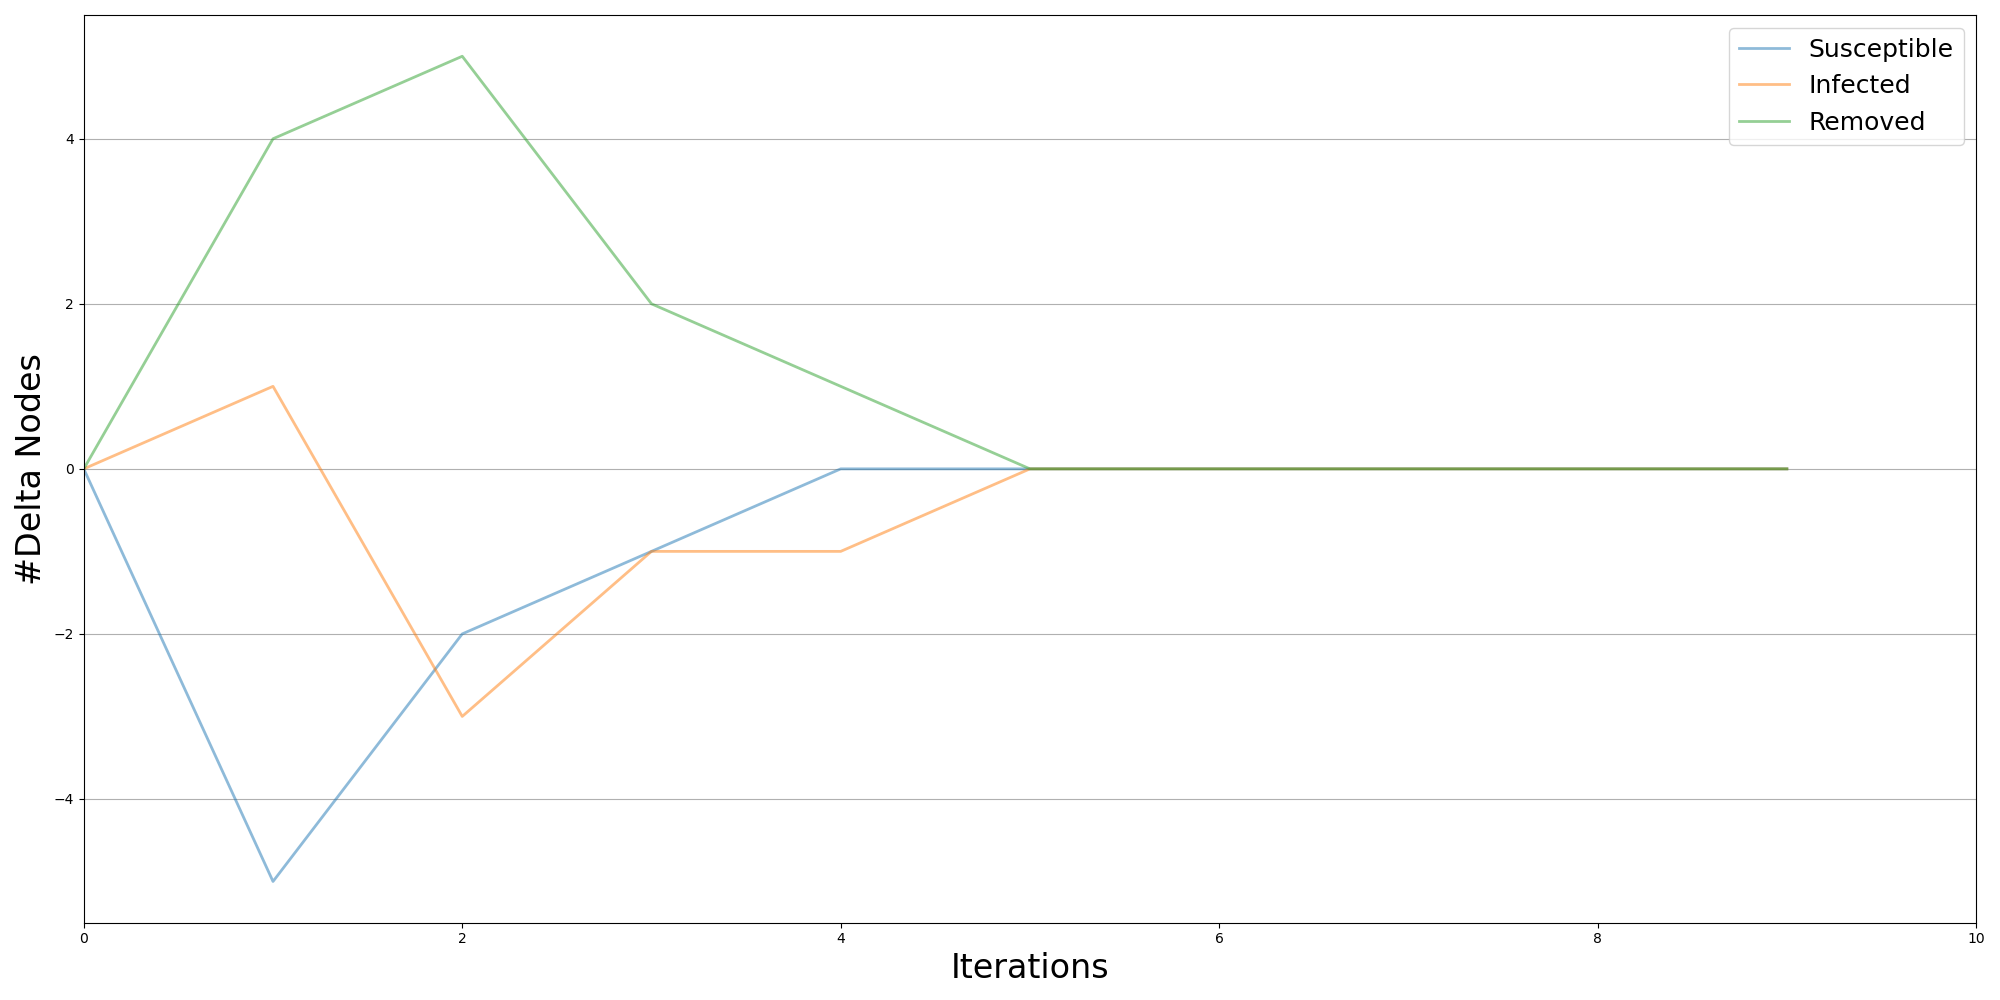

In [14]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Prevelance Trend:' + '\033[0m')
#print("Initial Adopters: Popular Nodes (highest degree centrality)")
Image(filename=pta + "mchobololo_diffusion_prevelance.png",  width = "400")

In [15]:
#print(G0.nodes.data())
#plt.rcParams['figure.constrained_layout_layout.use']=True
color_dict = {0: 'grey', 1: '#a31a1c', 2:  '#355e3b'}
#'#FF2400' '#32CD32'
#colours = ['#fecc5c', '#a31a1c']
plt.rcParams["figure.figsize"]=[8,10]
coord = nx.spring_layout(G_nxu_1, k=0.01,weight=None, iterations=1000)
title = ['t='+str(x) for x in range(0,6)]


#print(dict(filter(lambda x: x[0] if x[1]['it0'+str(1)]==1 else False, G_nxu_1.nodes(data=True))))
#print(df_st.loc[df_st['it01']==1.0])
for i in range(0,6):
    node_color = [color_dict[G_nxu_1.nodes[v]['it0'+str(i)]] for v in G_nxu_1.nodes]
    if i==0:
        edge_color = "grey"
    else:
        edge_color = [(color_dict[G_nxu_1.nodes[w]['it0'+str(i)]] if G_nxu_1.nodes[v]['it0'+str(i-1)]==G_nxu_1.nodes[w]['it0'+str(i)] and G_nxu_1.nodes[v]['it0'+str(i-1)]!=0 else 'silver' ) for v,w in G_nxu_1.edges]
    '''
    if i==1:
        for v,w in G_nxu_1.edges:
            if G_nxu_1.nodes[v]['it0'+str(i-1)] == G_nxu_1.nodes[w]['it0'+str(i)] and G_nxu_1.nodes[v]['it0'+str(i-1)]!=0:
                print(v,w)
                print((G_nxu_1.nodes[v]['it0'+str(i-1)],G_nxu_1.nodes[w]['it0'+str(i)]))
        print(G_nxu_1.edges)
        print([(color_dict[G_nxu_1.nodes[w]['it0'+str(i)]] if G_nxu_1.nodes[v]['it0'+str(i-1)]==G_nxu_1.nodes[w]['it0'+str(i)] and G_nxu_1.nodes[v]['it0'+str(i-1)]!=0 else 'silver' ) for v,w in G_nxu_1.edges])

    print(i)
    print(edge_color)
    '''
    #edge_color = [('silver' if (v,w) in external else G_nxu_1.edges[v,w]['hex_sc'+str(k)]) for v,w in G_nxu_1.edges]
    #plt.rcParams.update({'figure.figsize': (5, 5)})
    plt.clf()
    plt.axis('off')
    random.seed(1234)
    nx.draw_networkx_nodes(G_nxu_1, coord, node_size=20, node_color=node_color)
    random.seed(1234)
    nx.draw_networkx_edges(G_nxu_1, coord, alpha=1, edge_color=edge_color, width=1)
    #plt.tight_layout()
    #plt.title(title[i])
    #out.save(pta + "mchobololo_participation.png")
    plt.savefig(pta + "mchobololo_diffusion_" + str(i) + ".png")
    plt.show()
    
    




--------
Diffusion Network:
Node colour:4 adopters at time t=0 (red)


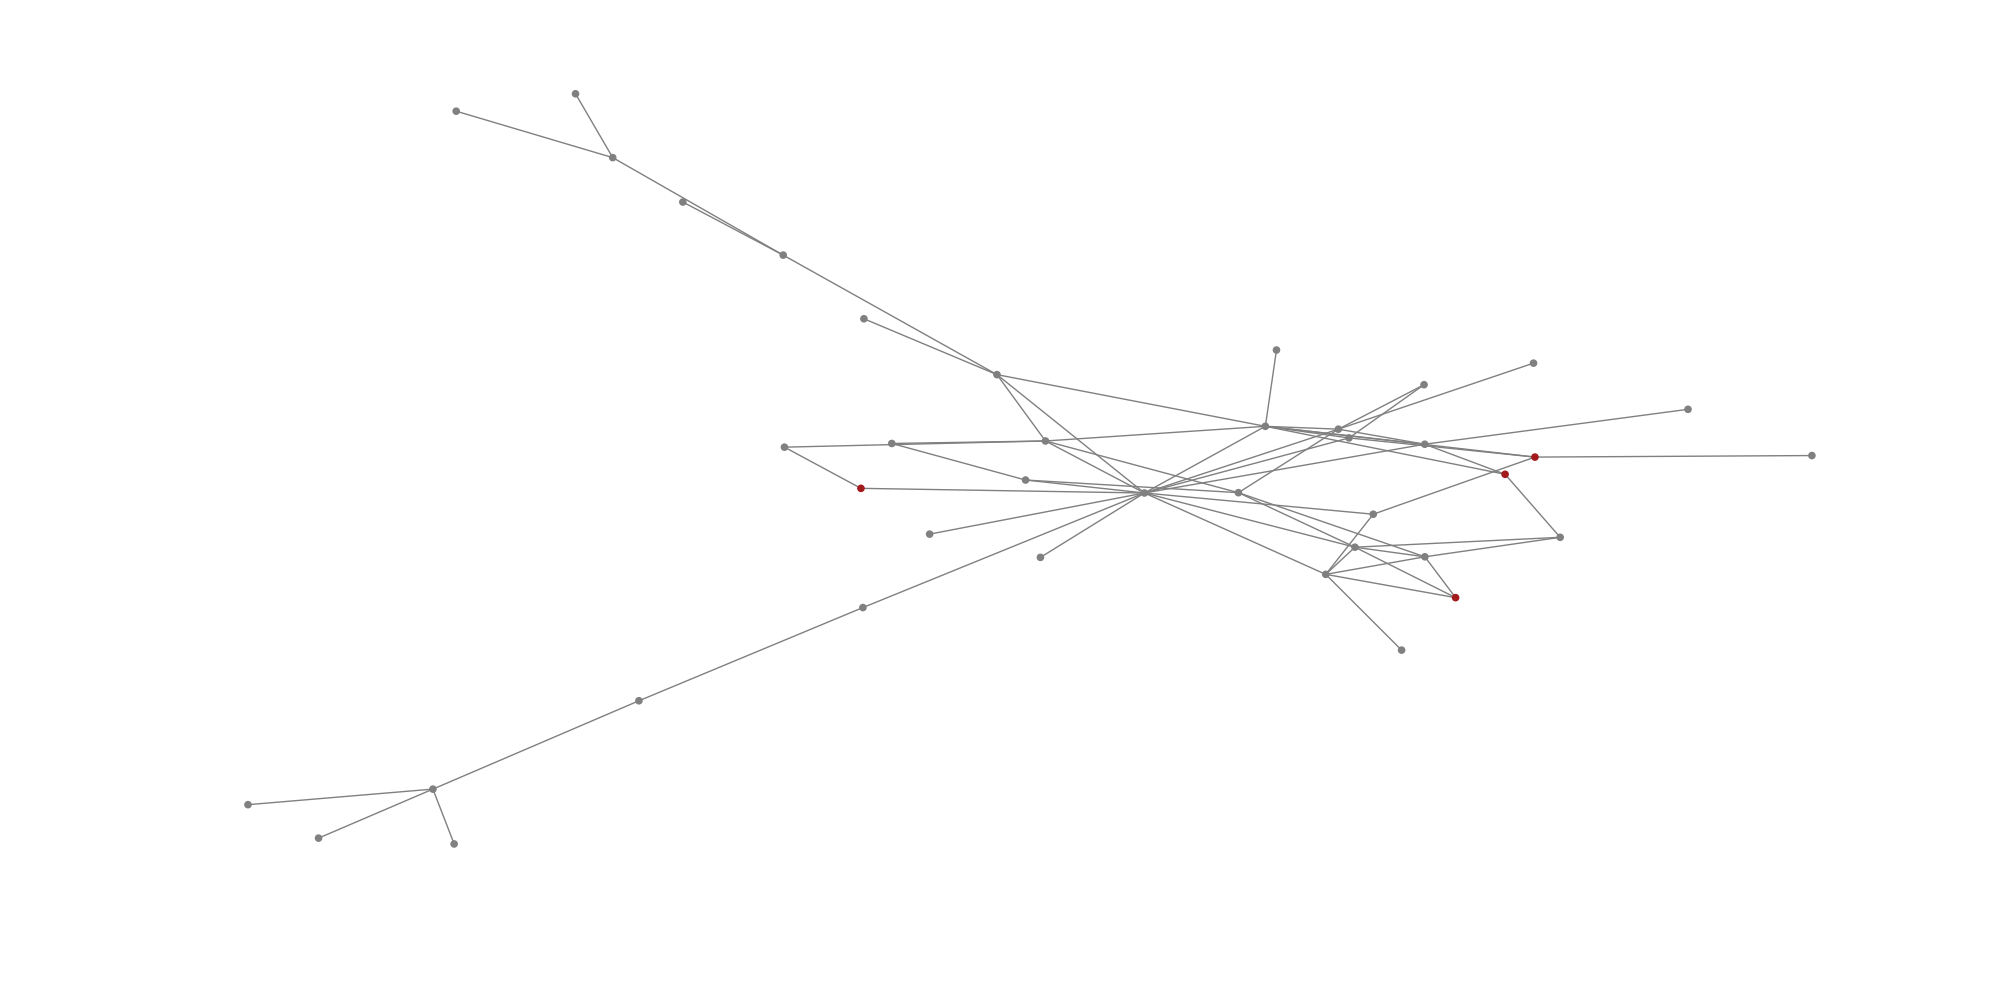

In [16]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Network:' + '\033[0m')
print("Node colour:" + str(len(df_st['it01'].loc[df_st['it00']==1.0])) + " adopters at time t=0 (red)")
Image(filename=pta + "mchobololo_diffusion_0.png",  width = "400")

Node colour: 9 adopters at time t=1 (red)


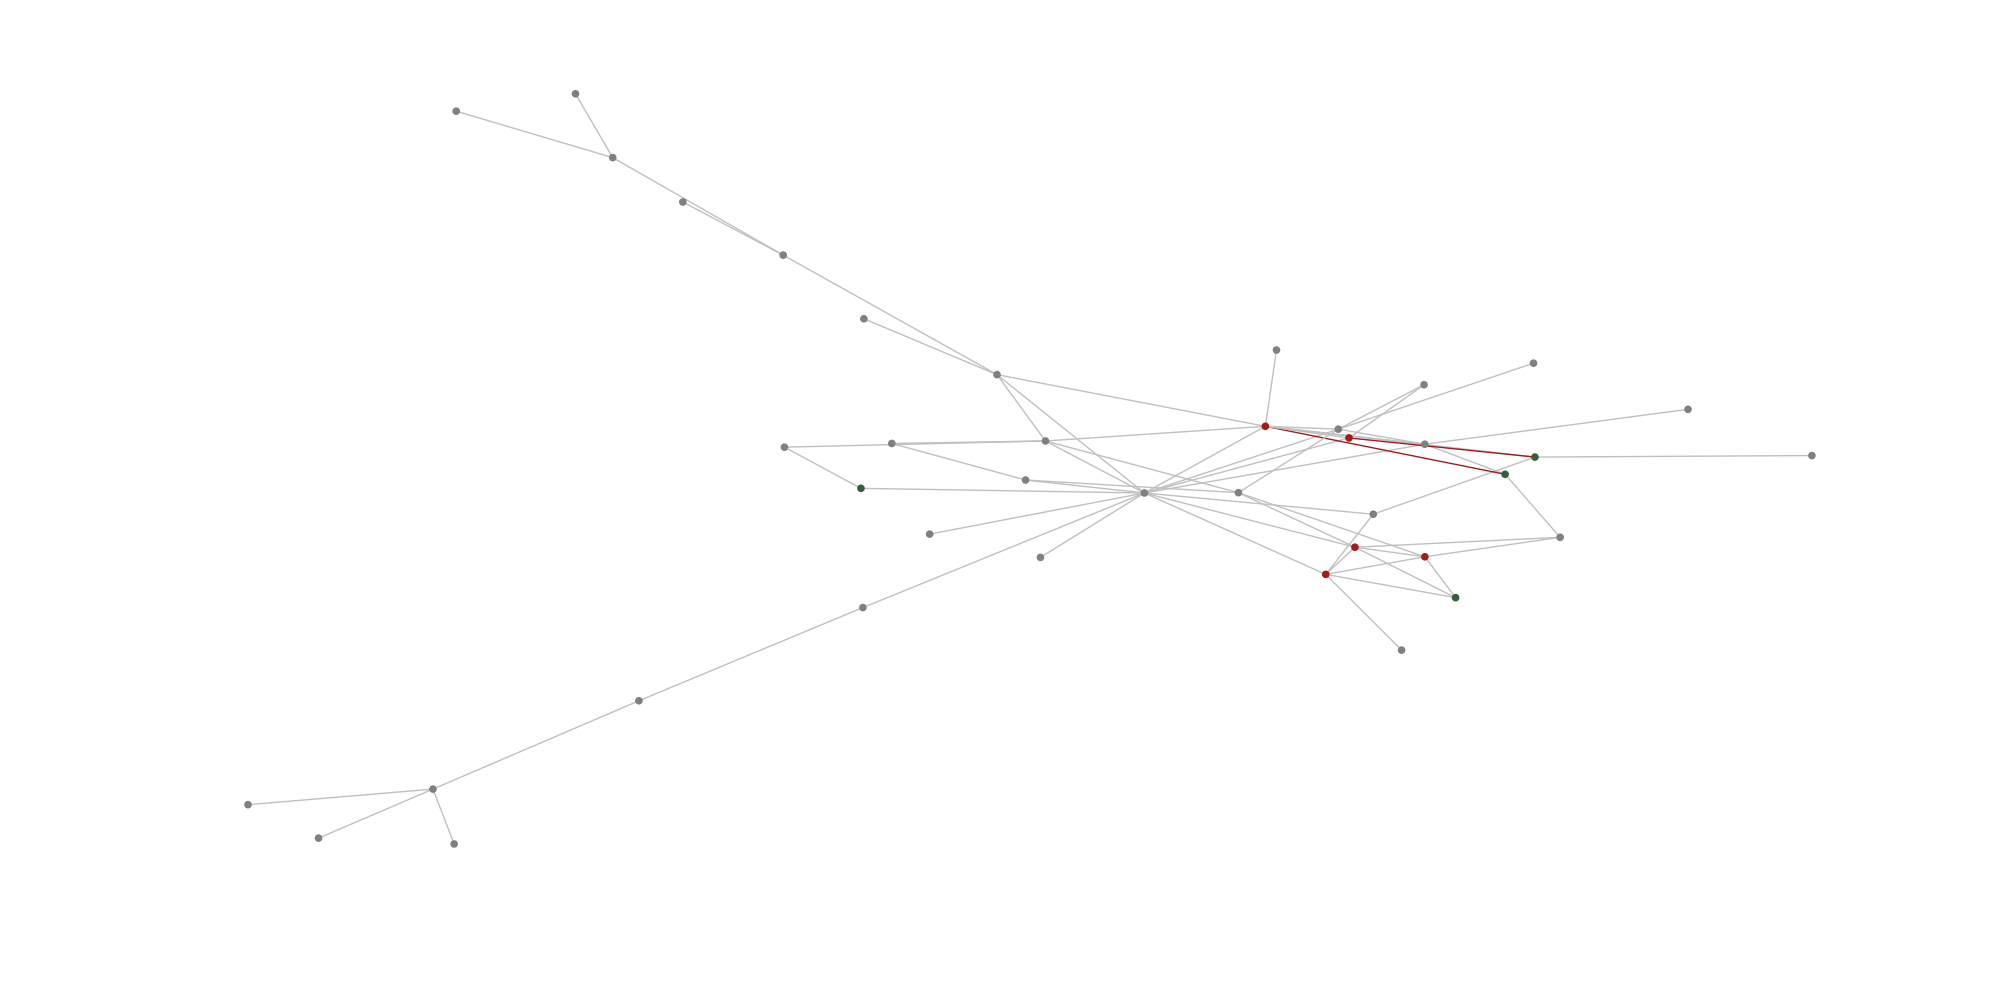

In [17]:

print("Node colour: " + str(len(df_st['it01'].loc[df_st['it01']>0.0])) + " adopters at time t=1 (red)")
Image(filename=pta + "mchobololo_diffusion_1.png",  width = "400")

Node colour: 11 adopters at time t=2 (red)


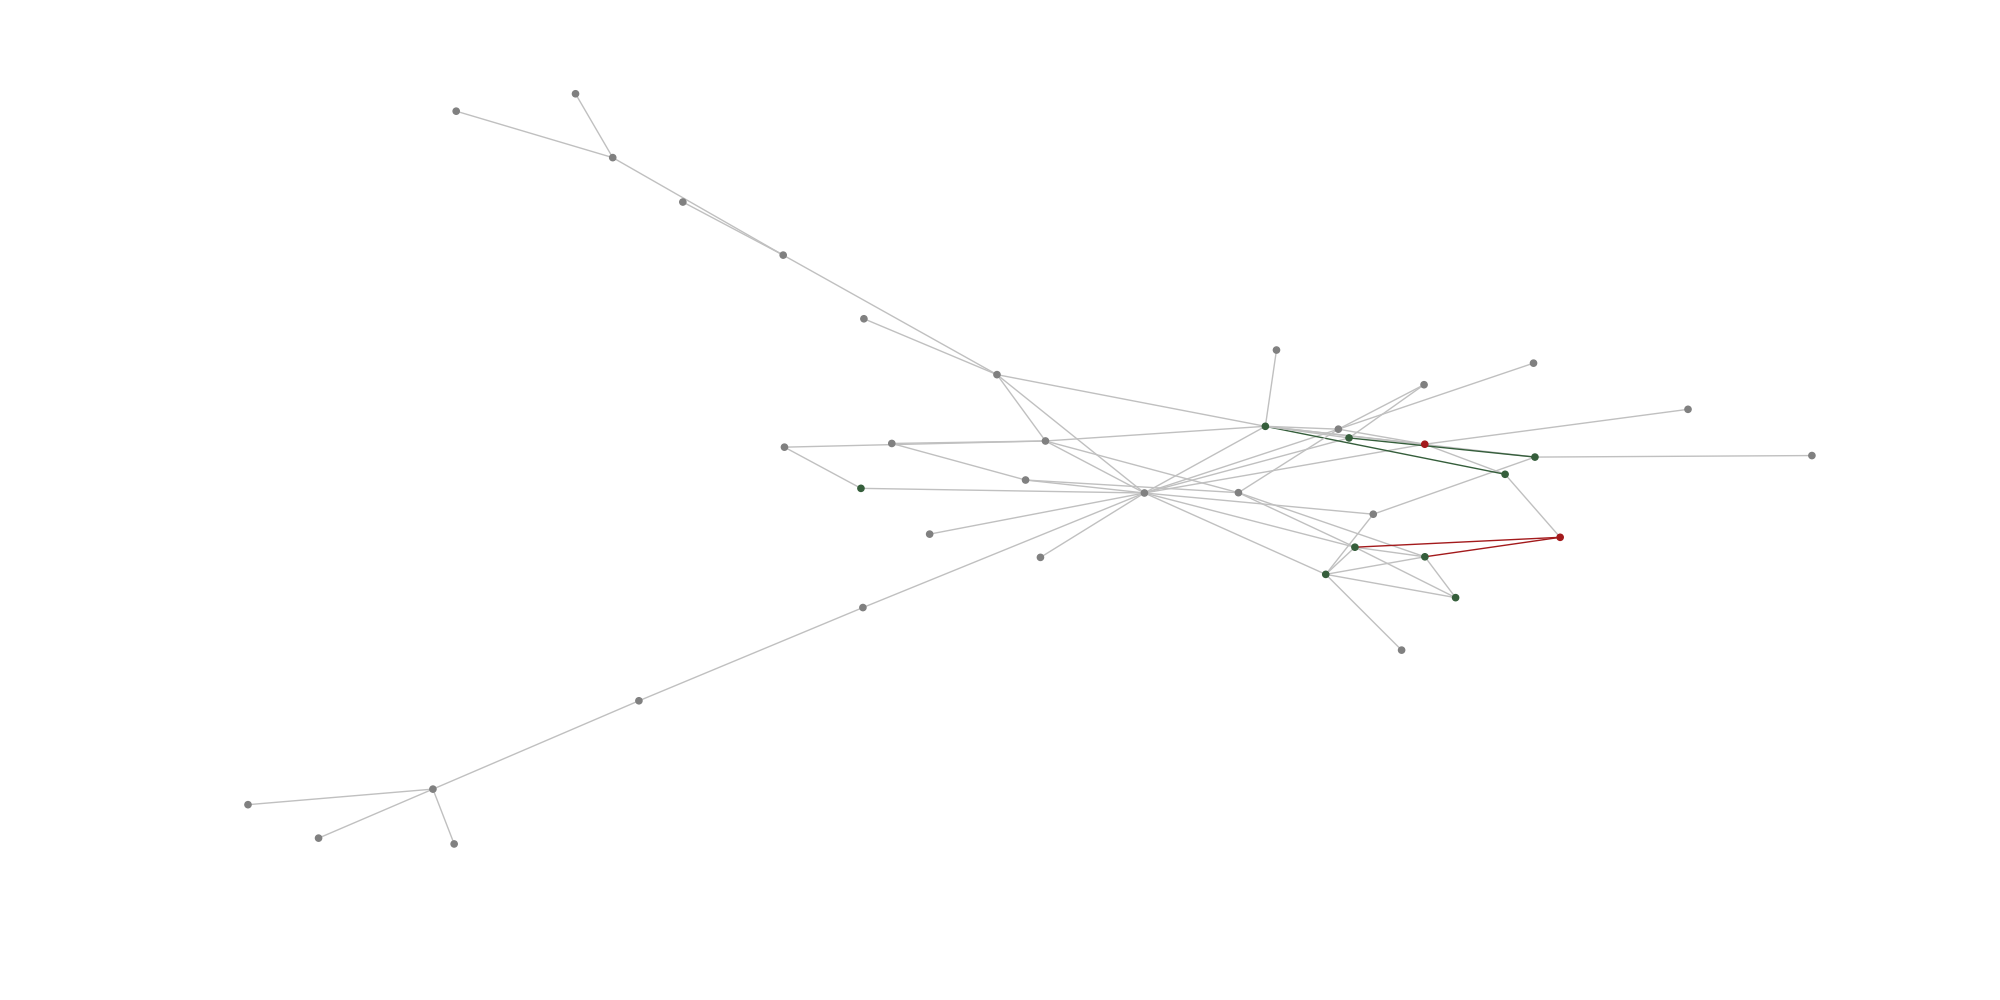

In [18]:
print("Node colour: " + str(len(df_st['it02'].loc[df_st['it02']>0.0])) + " adopters at time t=2 (red)")
Image(filename=pta + "mchobololo_diffusion_2.png",  width = "400")

Node colour: 12 adopters at time t=3 (red)


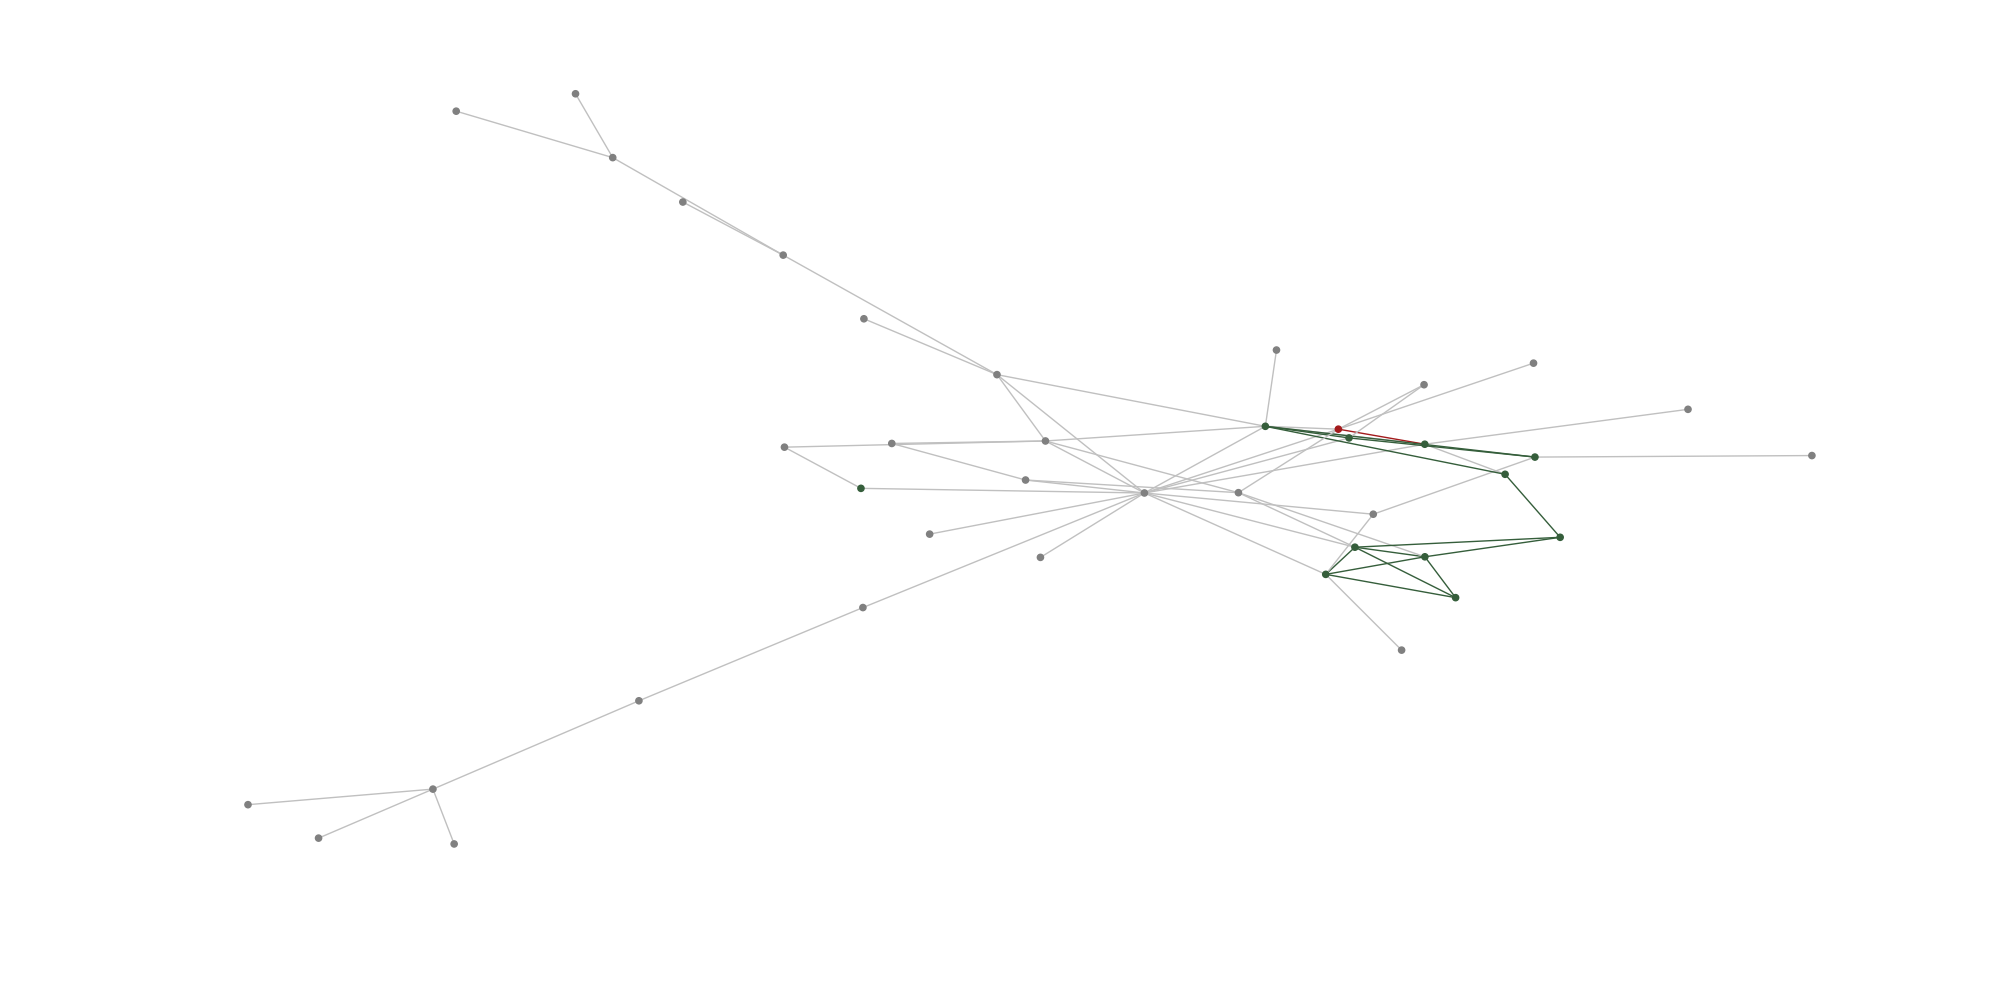

In [19]:
print("Node colour: " + str(len(df_st['it03'].loc[df_st['it03']>0.0])) + " adopters at time t=3 (red)")
Image(filename=pta + "mchobololo_diffusion_3.png",  width = "400")

Node colour: 12 adopters at time t=4 (red)


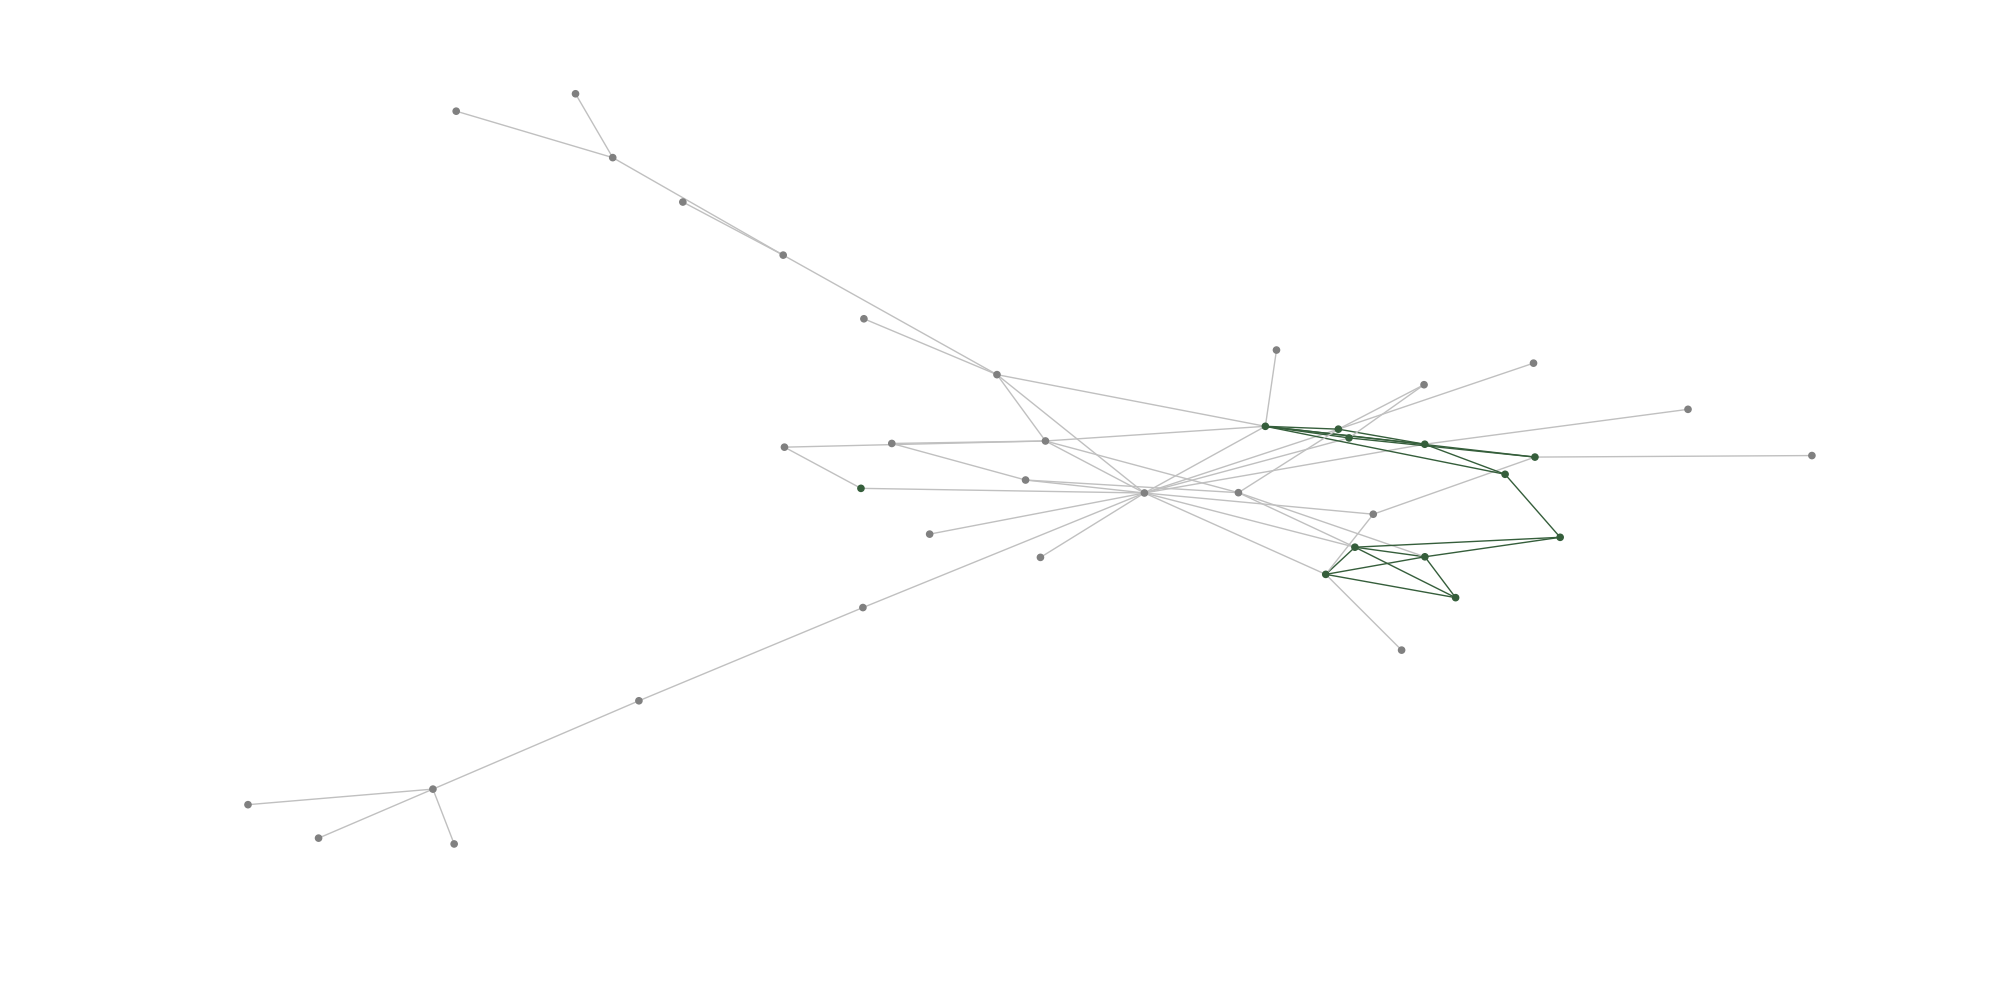

In [20]:
print("Node colour: " + str(len(df_st['it04'].loc[df_st['it04']>0.0])) + " adopters at time t=4 (red)")
Image(filename=pta + "mchobololo_diffusion_4.png",  width = "400")

Node colour: 12 adopters at time t=5 (red)


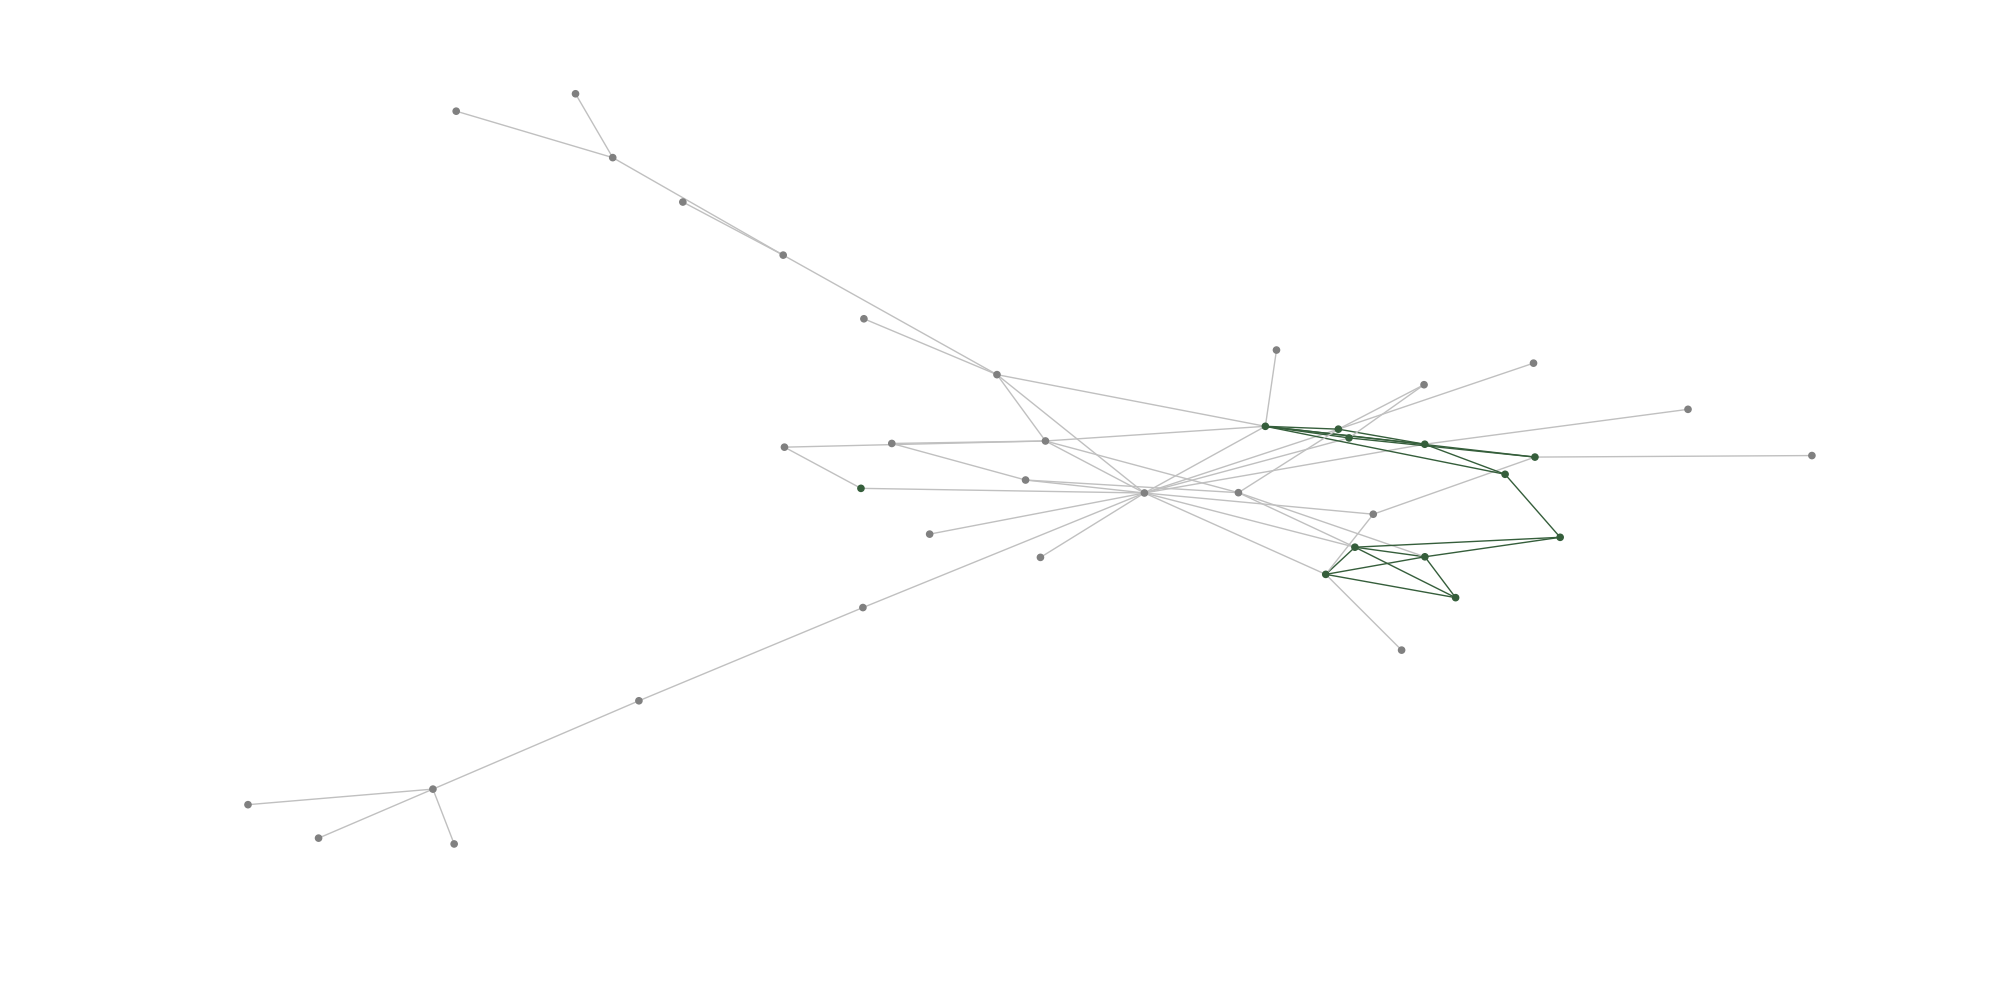

In [21]:
print("Node colour: " + str(len(df_st['it05'].loc[df_st['it05']>0.0])) + " adopters at time t=5 (red)")
Image(filename=pta + "mchobololo_diffusion_5.png",  width = "400")

##### 3.2. Evaluation


In [22]:
inf_deg = [v for v,c in sorted(nx.degree_centrality(G_nxu_1).items(), key=lambda x:x[1], reverse=True)][0:no_inf]
inf_btw = [v for v,c in sorted(nx.betweenness_centrality(G_nxu_1).items(), key=lambda x:x[1], reverse=True)][0:no_inf]
inf_cor = [v for v,c in sorted(nx.core_number(G_nxu_1).items(), key=lambda x:x[1], reverse=True)][0:no_inf]
#print([v for v,c in sorted(nx.degree_centrality(G_nxu_1).items(), key=lambda x:x[1], reverse=True)])
#print(no_inf, [G_nxu_1.nodes[i]['id'] for i in inf_deg])

inf_lst=[inf_deg, inf_btw, inf_cor]

no_inf0=[]
no_inf5=[]
for n,x in enumerate(inf_lst):
    n= n+1
    # Model selection
    model = ep.ICEPModel(G_nxu_1)

    # Model Configuration
    config = mc.Configuration()
    #config.add_model_parameter('fraction_infected', 0.1)
    config.add_model_parameter('permeability', 0.3)
    config.add_model_initial_configuration('Infected', x)

    # Setting node parameters
    for v in G_nxu_1.nodes():
        com = G_nxu_1.nodes[v]['community_op']
        config.add_node_configuration("com", v, com)

    # Setting the edge parameters
    threshold = 0.3
    for e in G_nxu_1.edges():
        config.add_edge_configuration("threshold", e, threshold)

    model.set_initial_status(config)

    # Simulation execution
    random.seed(1234)
    iterations = model.iteration_bunch(10)
    #print(iterations)
    trends = model.build_trends(iterations)

    # Visualization
    viz = DiffusionTrend(model, trends)
    viz.plot(pta + "protea_diffusion_trend_"+str(n+1)+".png")

    viz = DiffusionPrevalence(model, trends)
    viz.plot(pta +"protea_diffusion_prevelance_"+str(n+1)+".png")

    # Store values
    #iterations.write_snapshots()
    dict_st={}
    id_st={}
    #print(iterations)
    for it in iterations[0:7]:
        #print(it['iteration'])
        id_st = {innerKey:values for innerKey, values in it['status'].items()} 
        dict_st[it['iteration']] = id_st            
        #print(dict_st)
        col_st = ["it" + str(i) for i in range(0,7)]
    df_st = pd.DataFrame(dict_st)
    df_st = df_st.fillna(0)
    df_st.columns = col_st
    #print(df_st)
    for a in range(0,6):
            if a==0:
                df_st["it0"+str(a)+"_"+str(n)] = df_st["it"+str(a)].astype("float")
            else:
                df_st["it0"+str(a)+"_"+str(n)] = df_st["it0"+str(a-1)+"_"+str(n)].astype("float") + df_st["it"+str(a)].astype("float")
            df_st["it0"+str(a)+"_"+str(n)] = df_st["it0"+str(a)+"_"+str(n)].replace(3,2)
    df_vdiff = df_vdiff.join(df_st.iloc[:,7:13])
    #print(df_st)
    nodes = df_st.to_dict('index')
    #print(nodes)
    nx.set_node_attributes(G_nxu_1, nodes)
    #print(G_nxu_1.nodes.data())
    no_inf0.append(len(df_st['it00'+"_"+str(n)].loc[df_st['it00'+"_"+str(n)]==1.0 ]))
    no_inf5.append(len(df_st['it05'+"_"+str(n)].loc[df_st['it05'+"_"+str(n)]>1.0]))
    
    
    # Plot Network
    for i in range(0,6):
        node_color = [color_dict[G_nxu_1.nodes[v]['it0'+str(i)+"_"+str(n)]] for v in G_nxu_1.nodes]
        if i==0:
            edge_color = "grey"
        else:
            edge_color = [(color_dict[G_nxu_1.nodes[w]['it0'+str(i)+"_"+str(n)]] if G_nxu_1.nodes[v]['it0'+str(i-1)+"_"+str(n)]==G_nxu_1.nodes[w]['it0'+str(i)+"_"+str(n)] and G_nxu_1.nodes[v]['it0'+str(i-1)+"_"+str(n)]!=0 else 'silver' ) for v,w in G_nxu_1.edges]

        #edge_color = [('silver' if (v,w) in external else G_nxu_1.edges[v,w]['hex_sc'+str(k)]) for v,w in G_nxu_1.edges]
        #plt.rcParams.update({'figure.figsize': (5, 5)})
        plt.clf()
        plt.axis('off')
        random.seed(1234)
        nx.draw_networkx_nodes(G_nxu_1, coord, node_size=20, node_color=node_color)
        random.seed(1234)
        nx.draw_networkx_edges(G_nxu_1, coord, alpha=1, edge_color=edge_color, width=1)
        #plt.tight_layout()
        #plt.title(title[i])
        #out.save(pta + "protea_participation.png")
        plt.savefig(pta + "mchobololo_diffusion_" + str(n+1) + "_" + str(i) + ".png")
        plt.show()

**Degree Centrality**


--------
Diffusion Prevelance Trend:


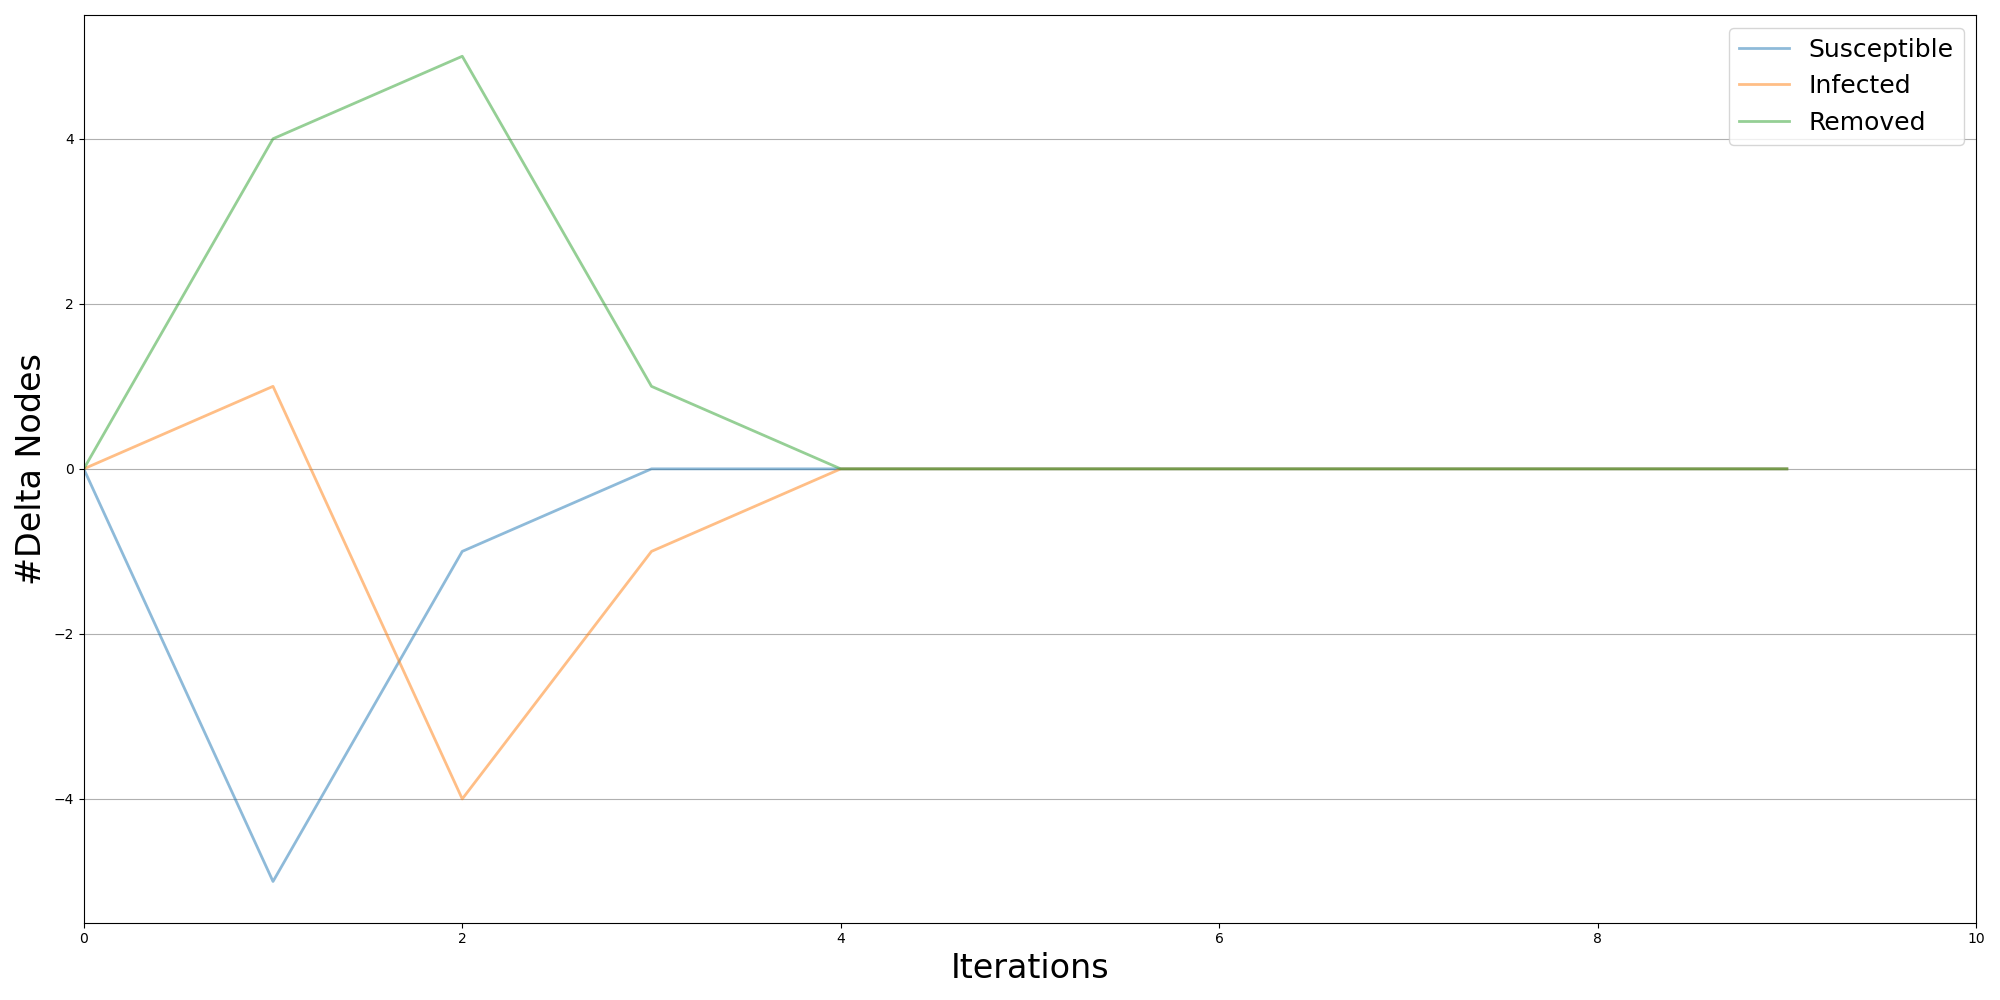

In [23]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Prevelance Trend:' + '\033[0m')
#print("Initial Infected: Popular Nodes (highest degree centrality)")
Image(filename=pta + "mchobololo_diffusion_prevelance_1.png",  width = "400")


--------
Diffusion Network:
Node colour: 4 adopters at time t=0 (red)


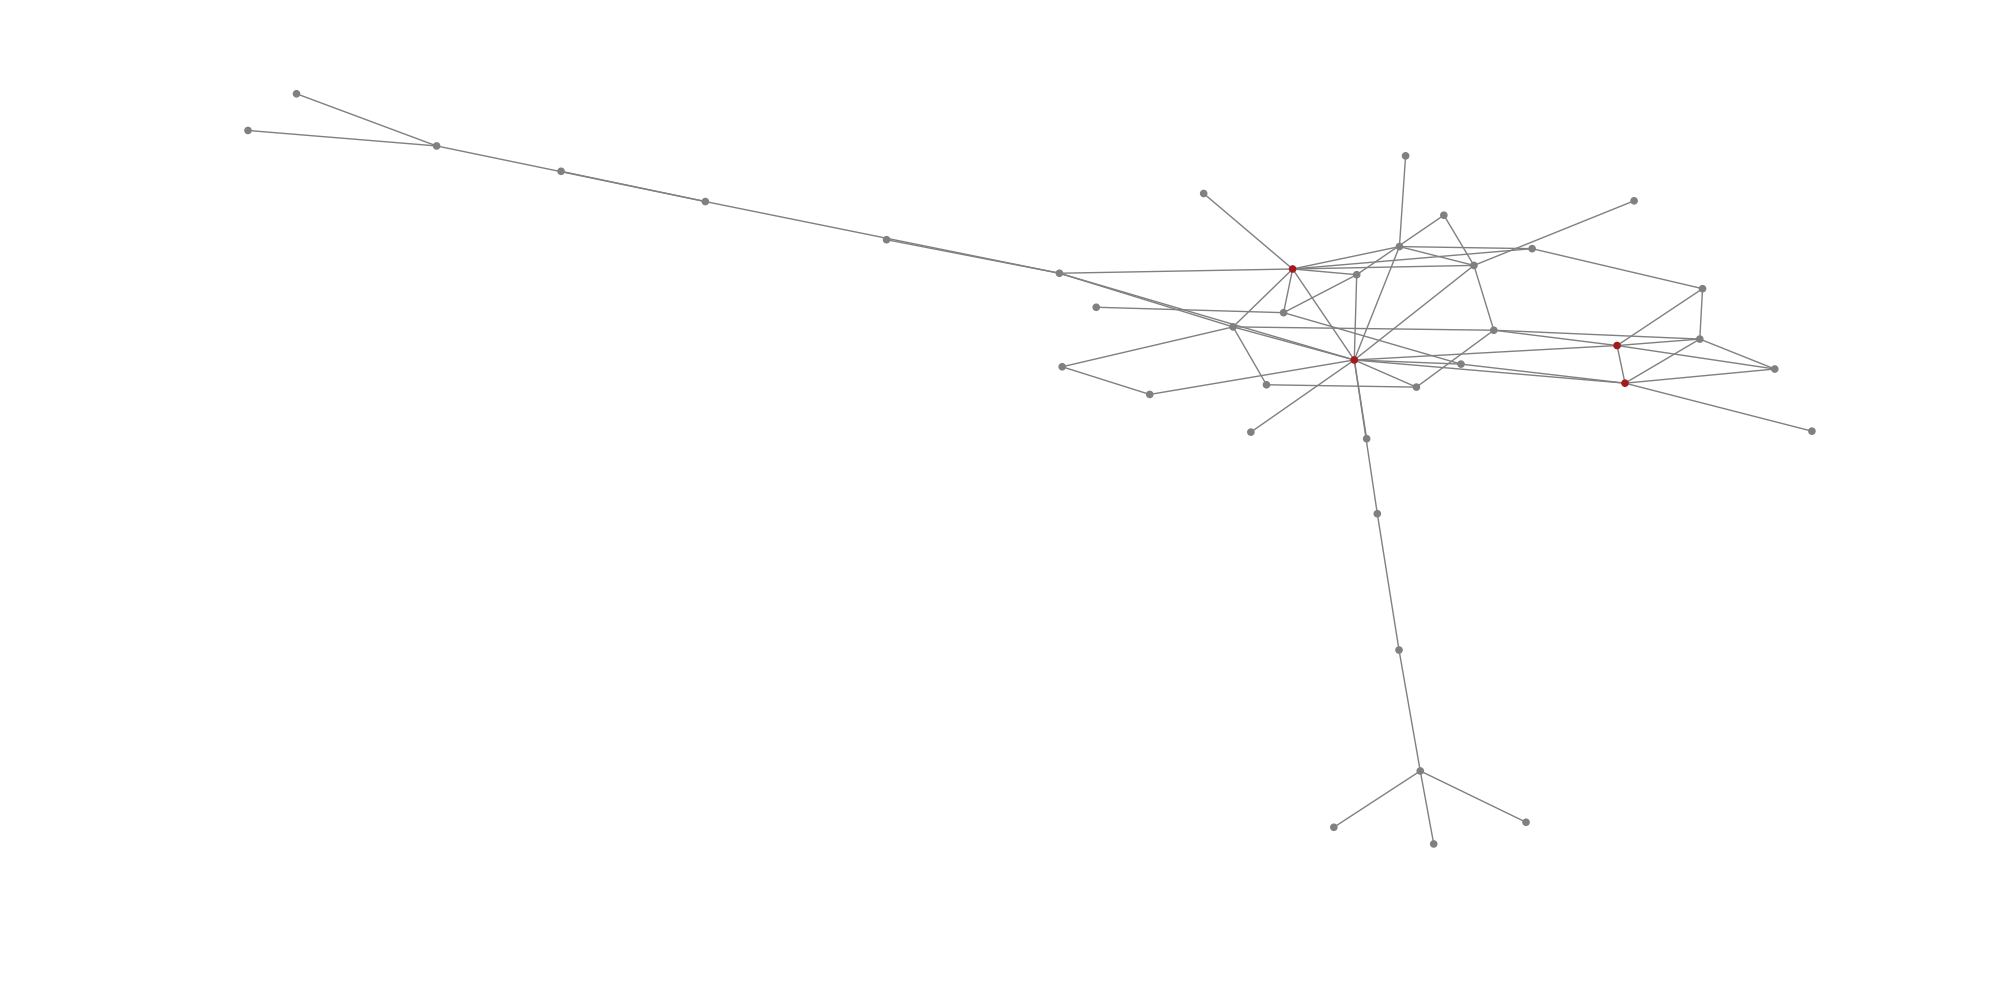

In [24]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Network:' + '\033[0m')
print("Node colour: " + str(no_inf0[0]) + " adopters at time t=0 (red)")
Image(filename=pta + "mchobololo_diffusion_1_0.png",  width = "400")

Node colour: 9 adopters at time t=5 (red)


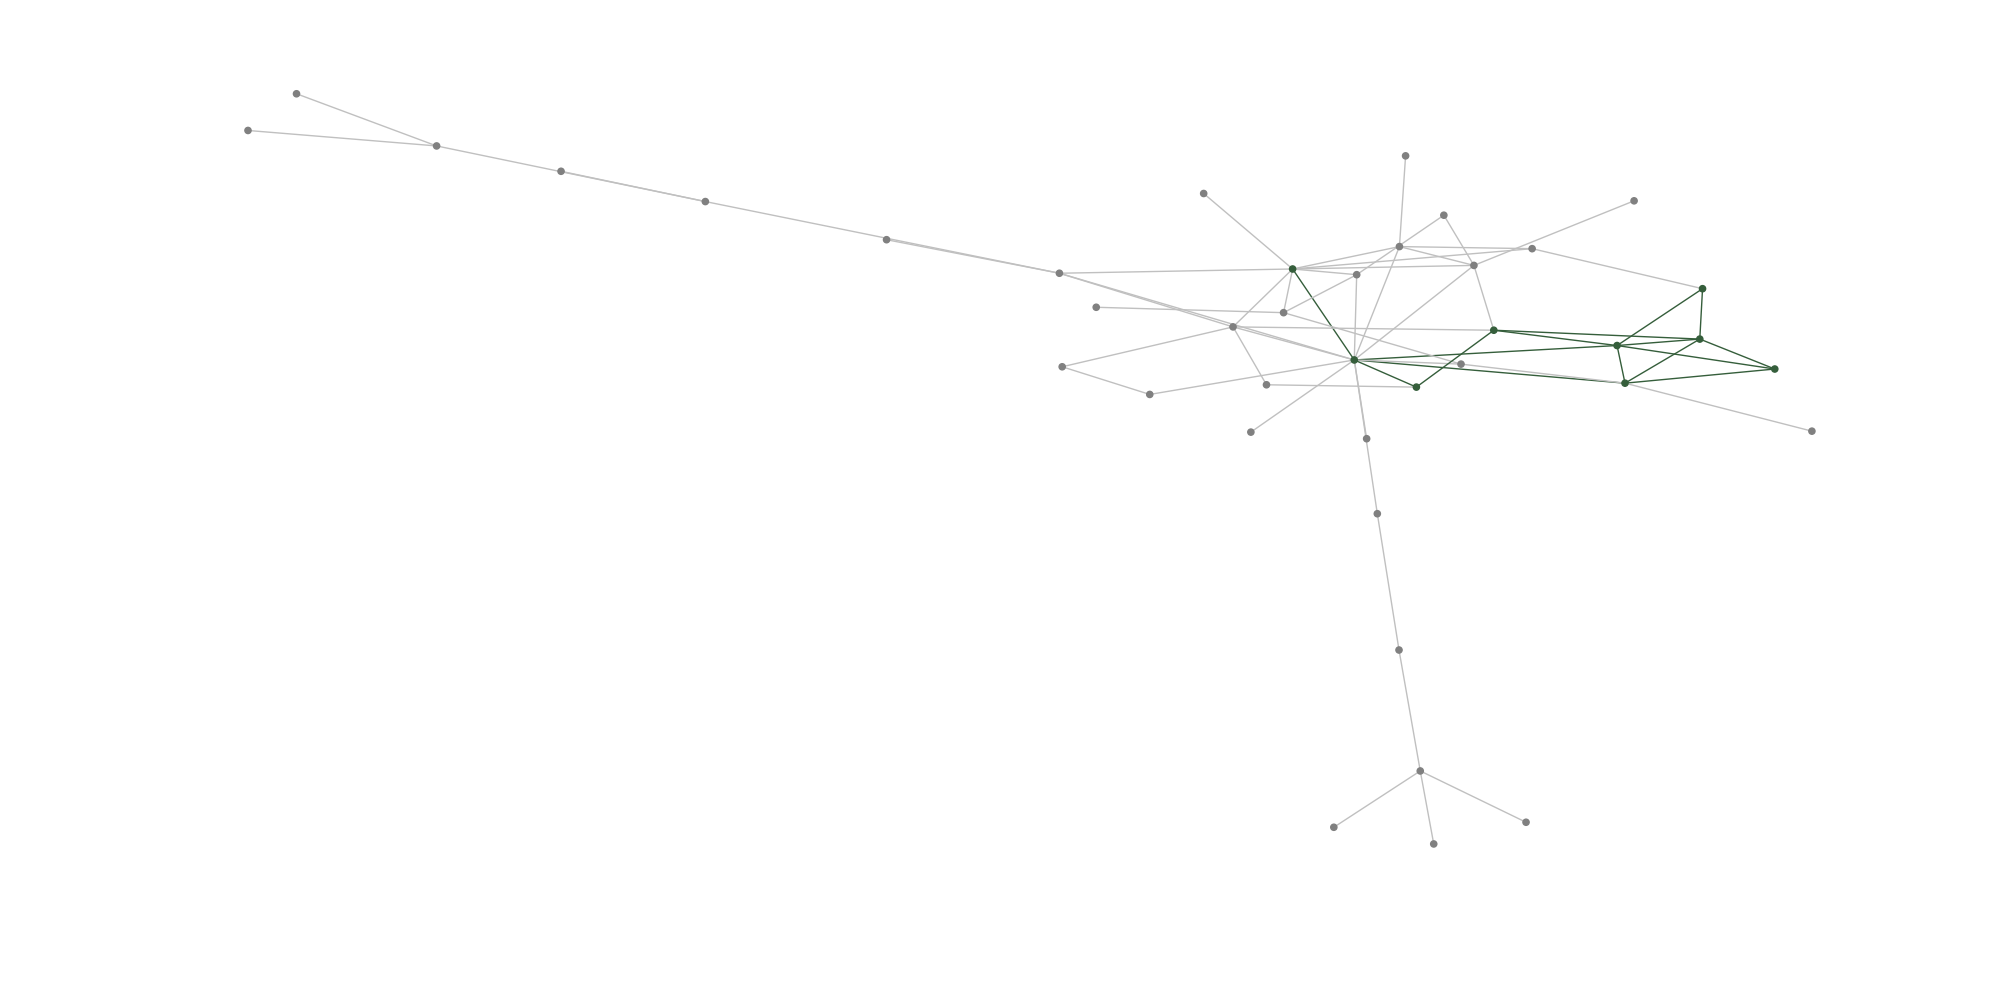

In [25]:
print("Node colour: " + str(no_inf5[0])+ " adopters at time t=5 (red)")
Image(filename=pta + "mchobololo_diffusion_1_5.png",  width = "400")

**Betweenness Centrality**



--------
Diffusion Prevelance Trend:


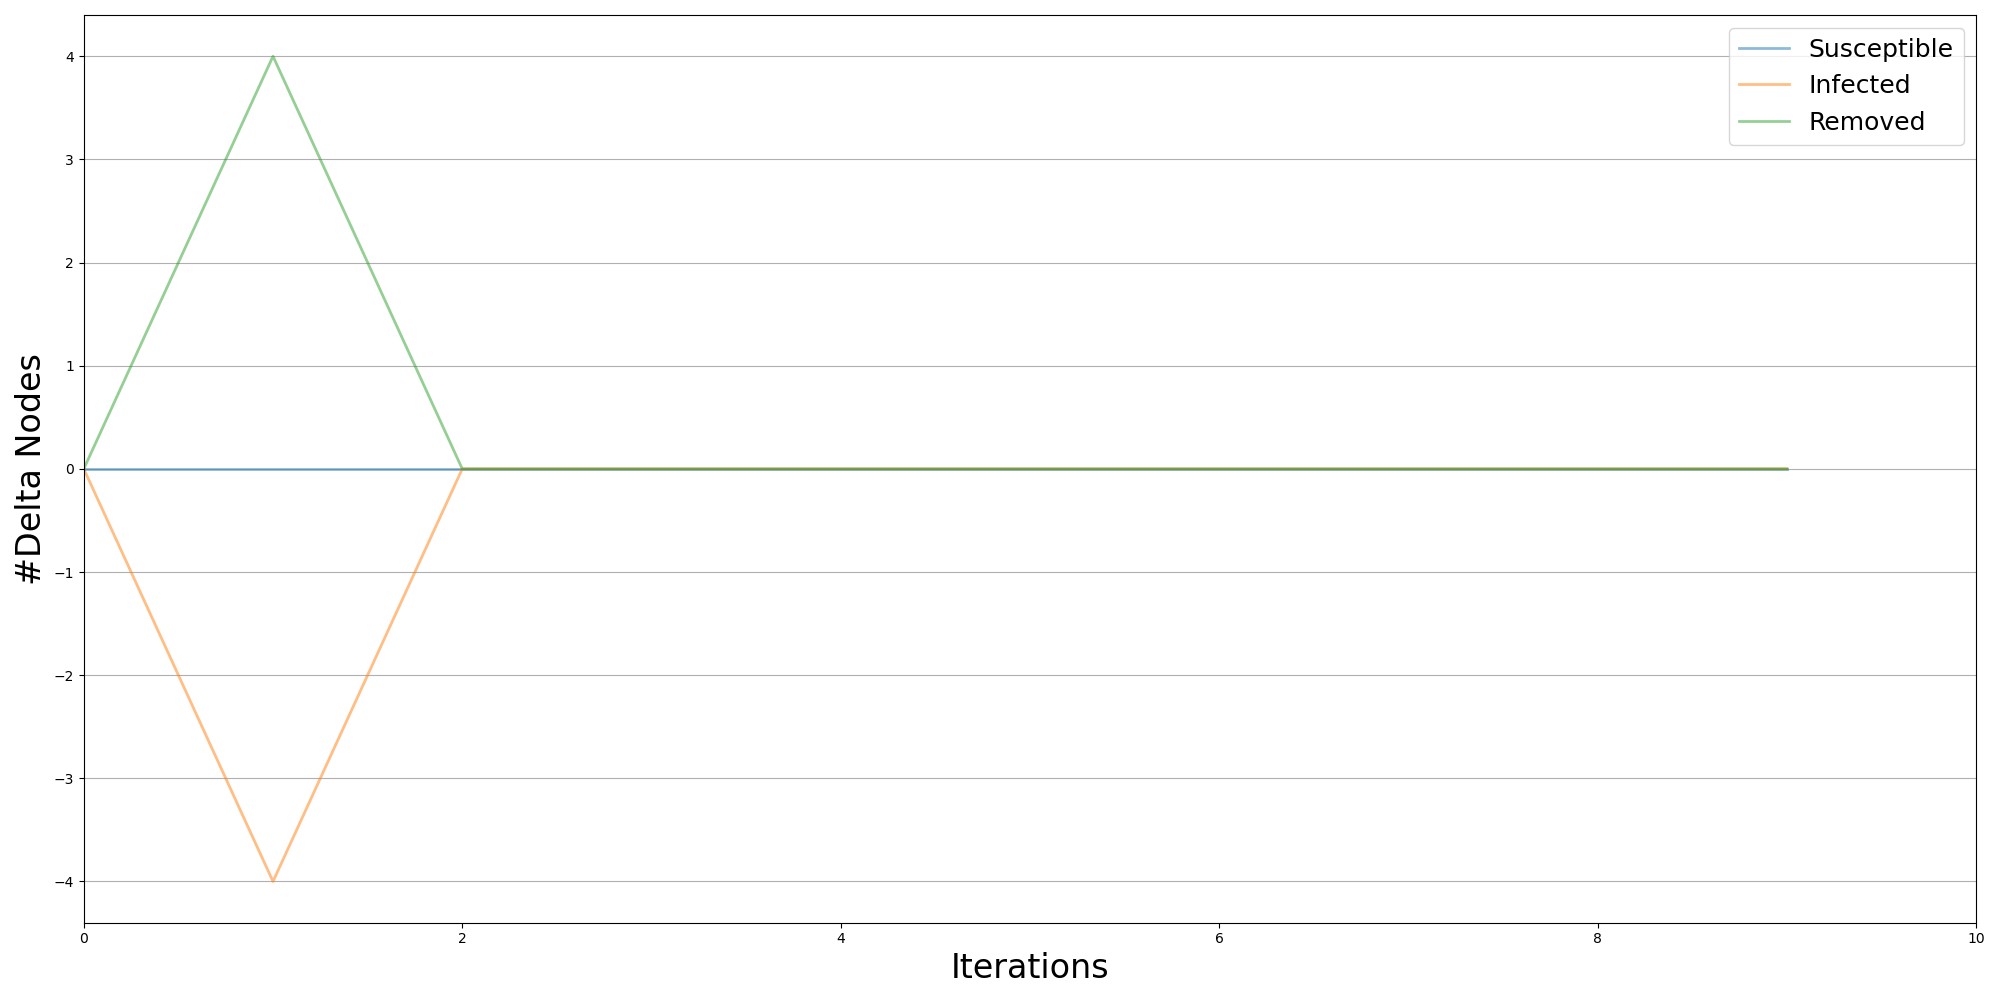

In [26]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Prevelance Trend:' + '\033[0m')
#print("Initial Infected: Bridge Nodes (highest betweenness centrality)")
Image(filename=pta + "mchobololo_diffusion_prevelance_2.png",  width = "400")


--------
Diffusion Network:
Node colour: 4 adopters at time t=0 (red)


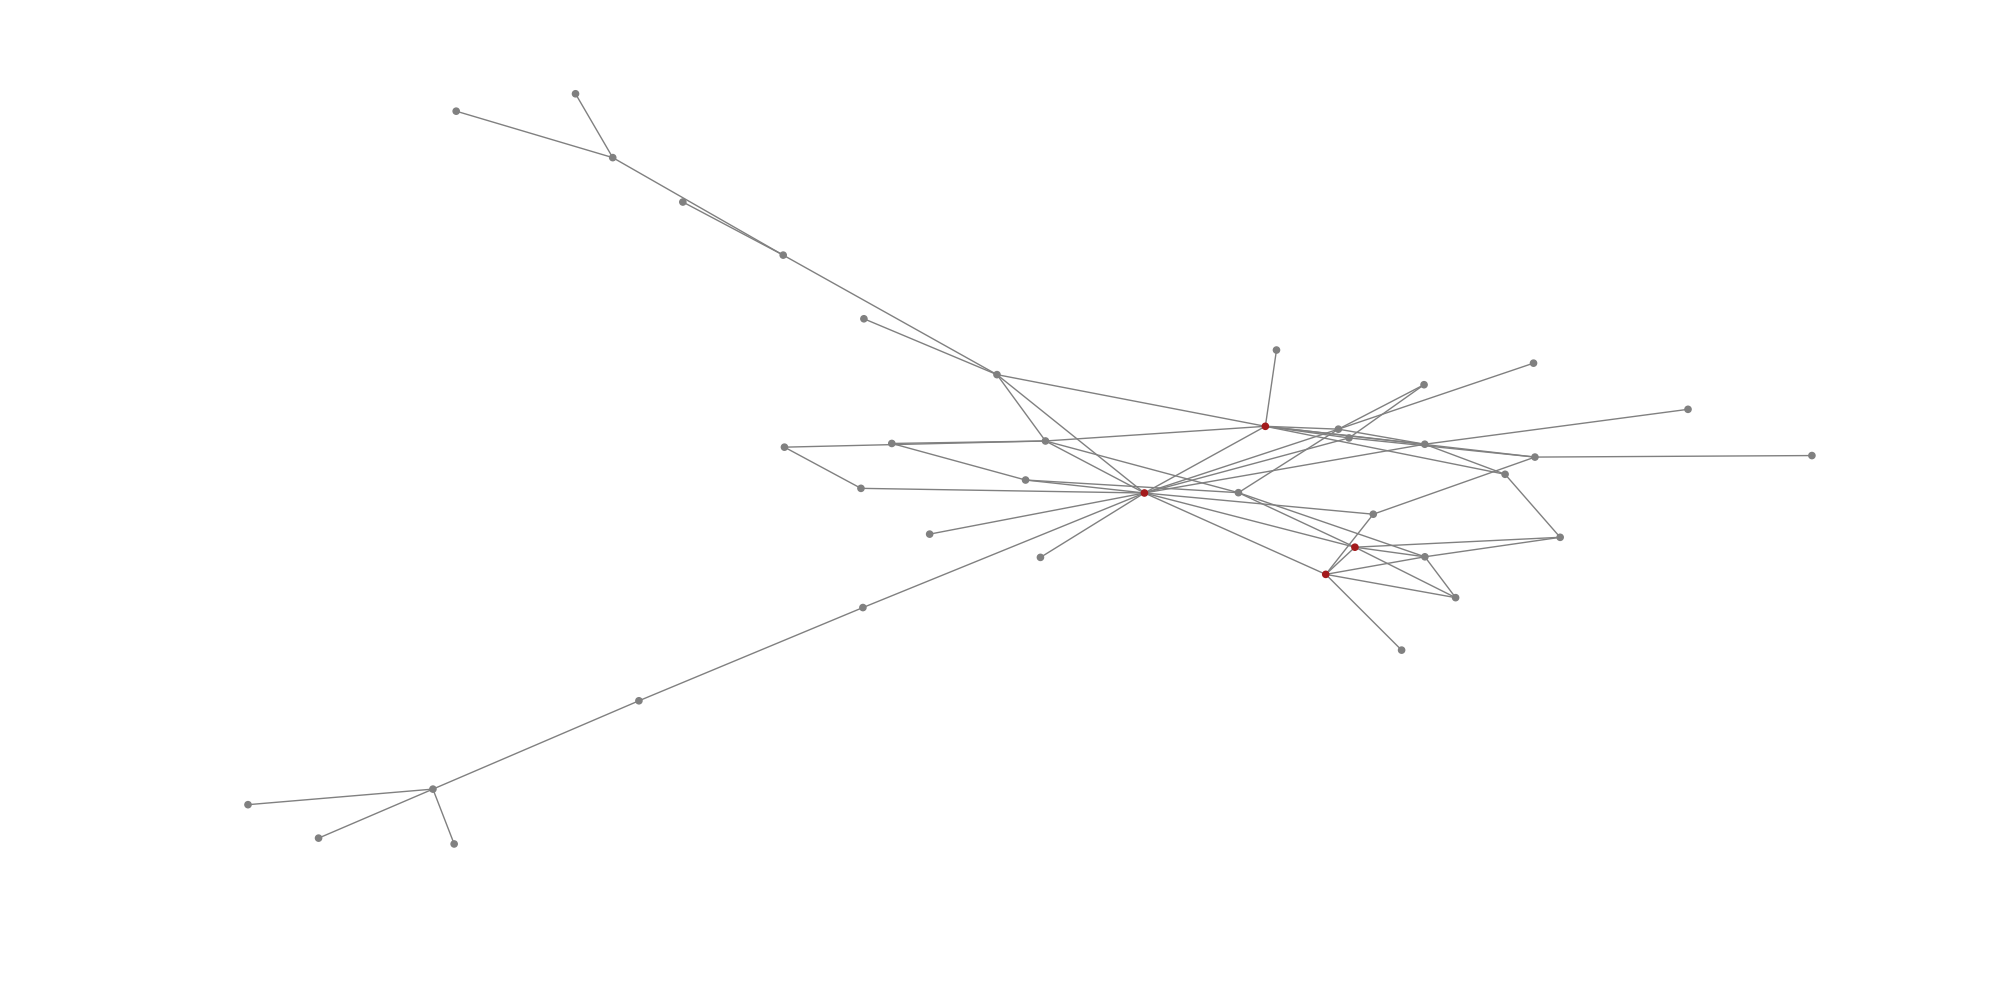

In [27]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Network:' + '\033[0m')
print("Node colour: " + str(no_inf0[1]) + " adopters at time t=0 (red)")
Image(filename=pta + "mchobololo_diffusion_2_0.png",  width = "400")

Node colour: 5 adopters at time t=5 (red)


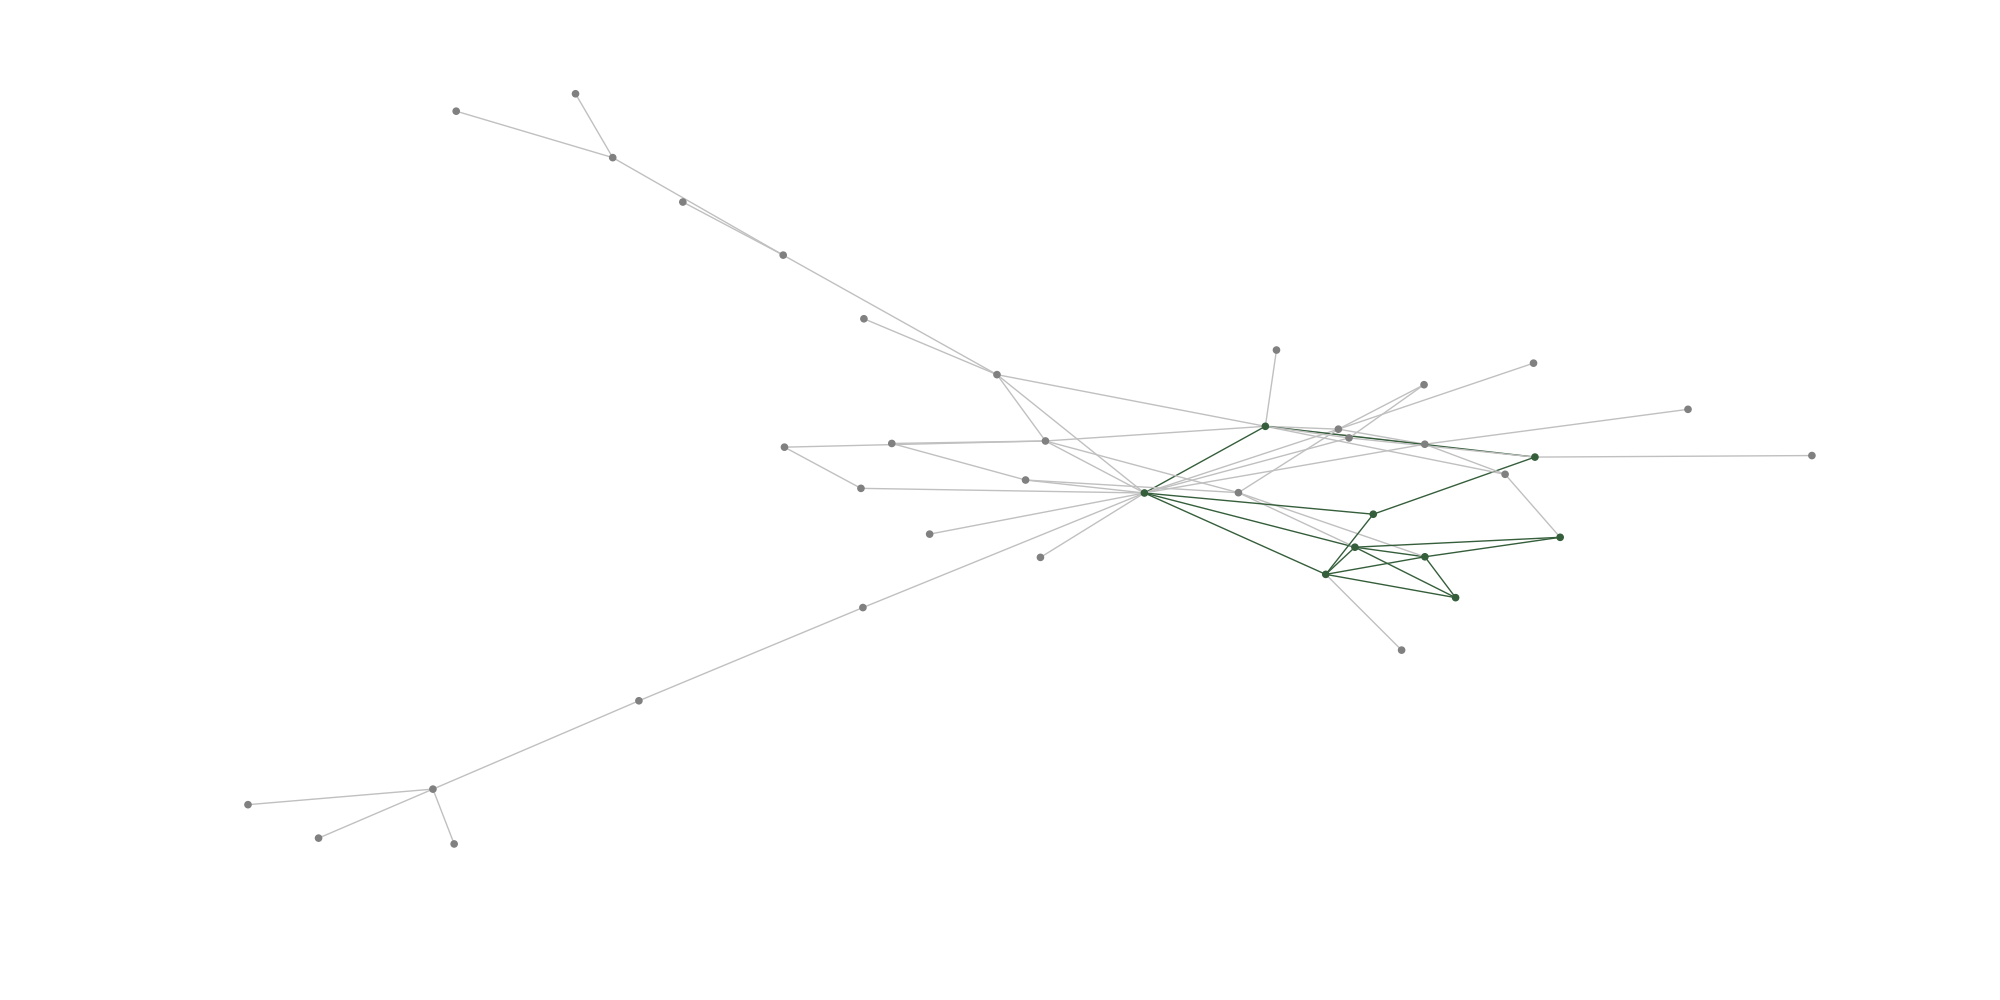

In [28]:
print("Node colour: " + str(no_inf5[1])+ " adopters at time t=5 (red)")
Image(filename=pta + "mchobololo_diffusion_2_5.png",  width = "400")

**K-Core Centrality**


--------
Diffusion Prevelance Trend:


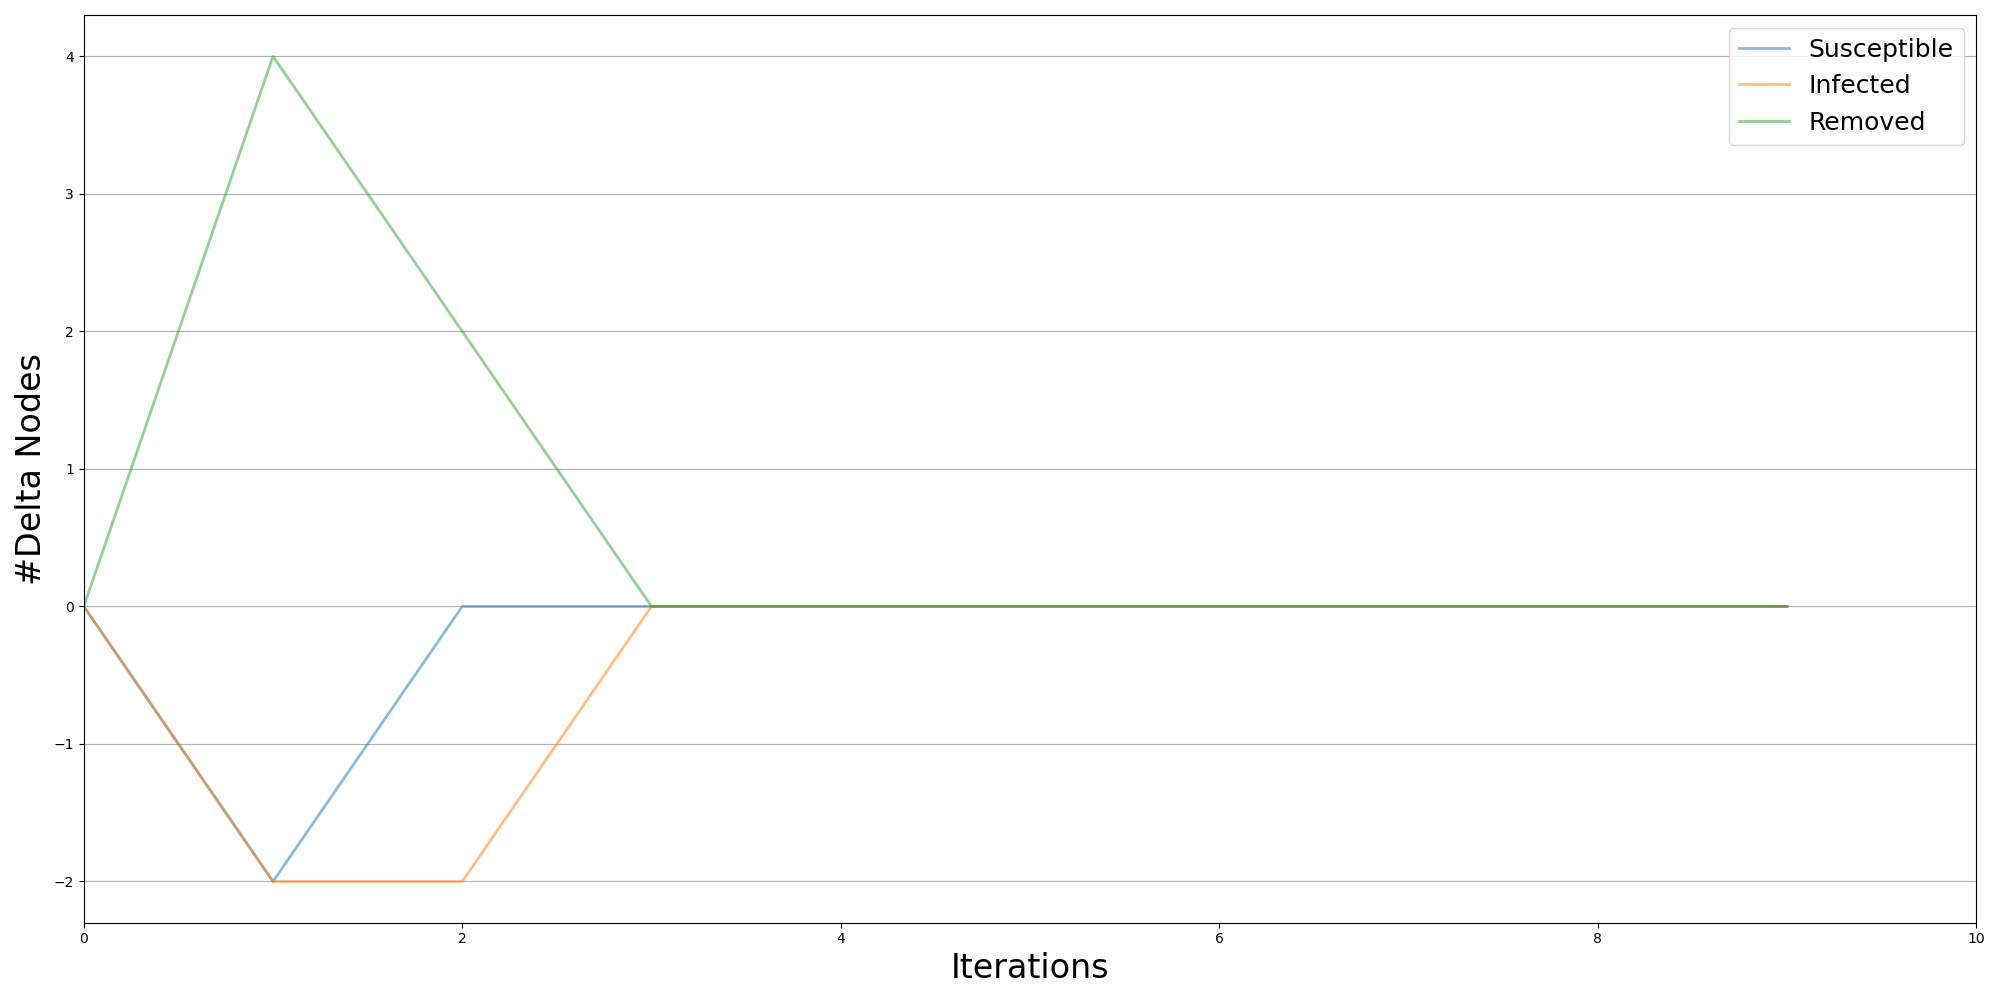

In [29]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Prevelance Trend:' + '\033[0m')
#print("Initial Infected: Core Nodes (highest coreness number)")
Image(filename=pta + "mchobololo_diffusion_prevelance_3.png",  width = "400")


--------
Diffusion Network:
Node colour: 4 adopters at time t=0 (red)


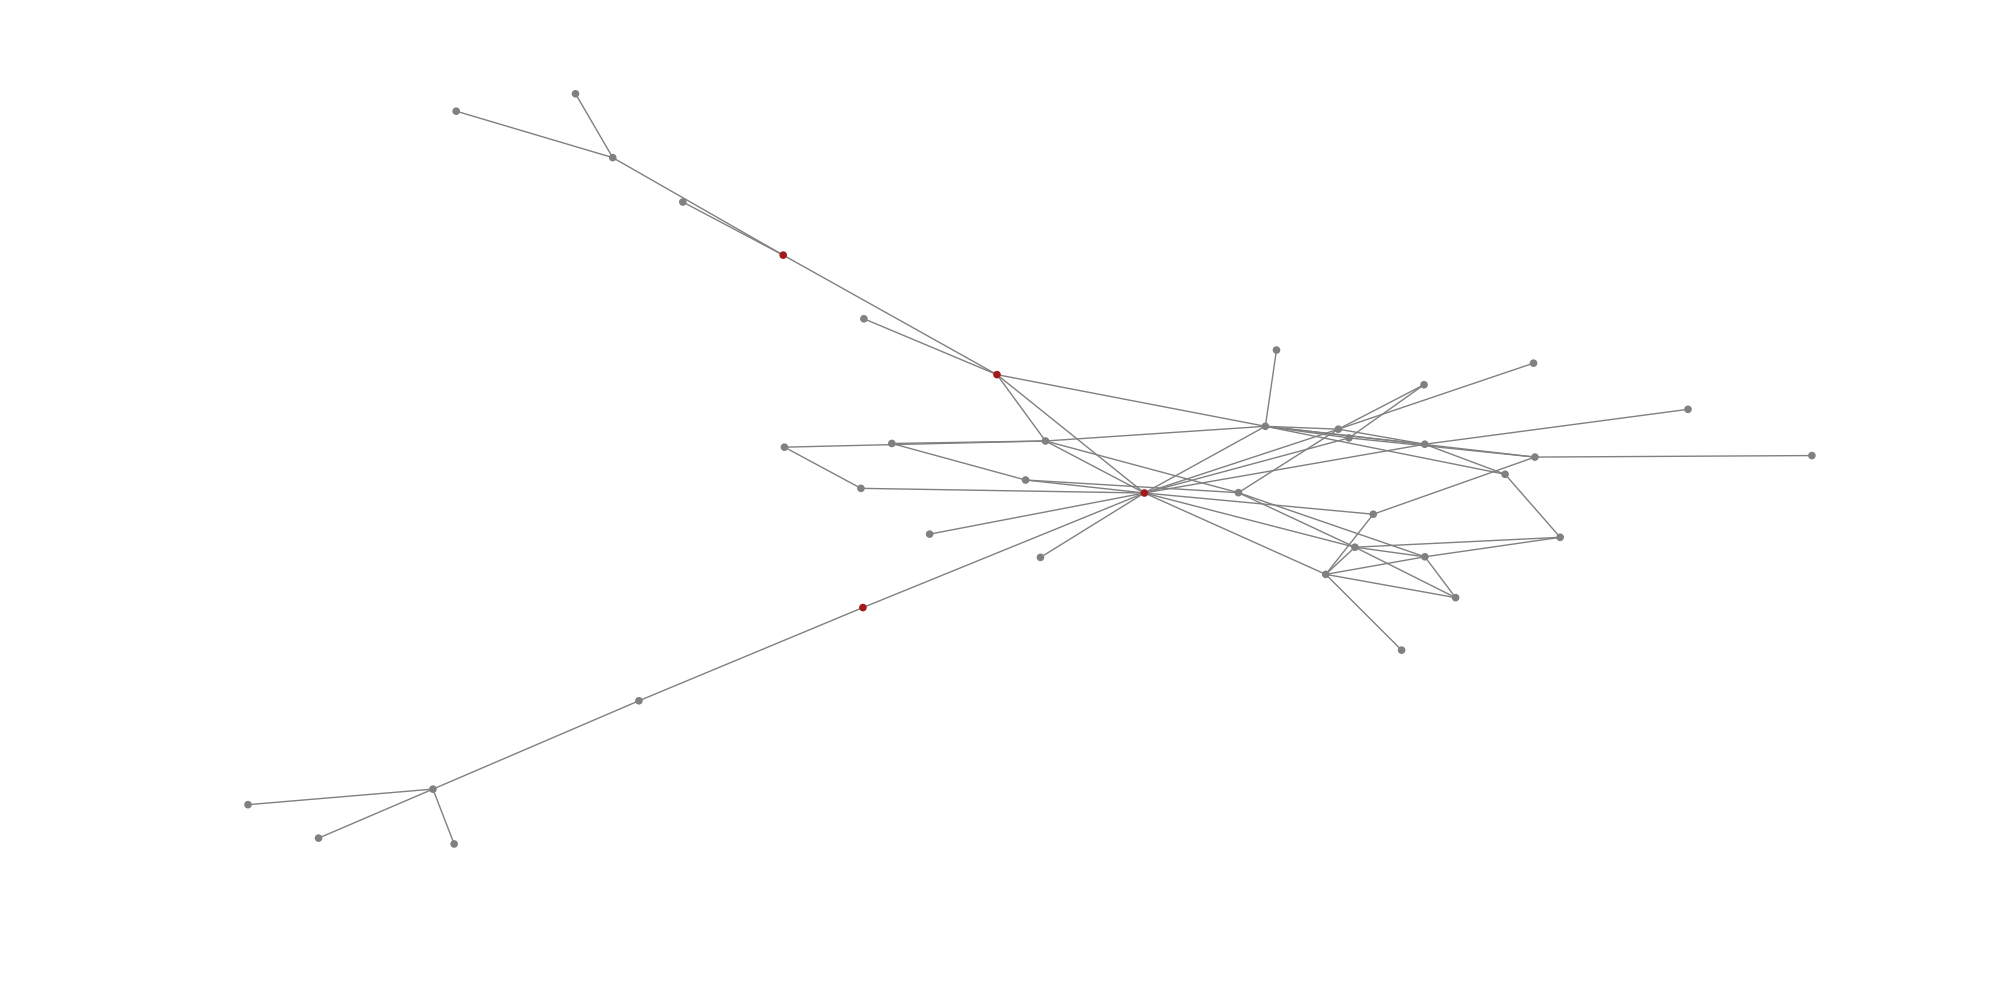

In [30]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Network:' + '\033[0m')
print("Node colour: " + str(no_inf0[2]) + " adopters at time t=0 (red)")
Image(filename=pta + "mchobololo_diffusion_3_0.png",  width = "400")

Node colour: 7 adopters at time t=5 (red)


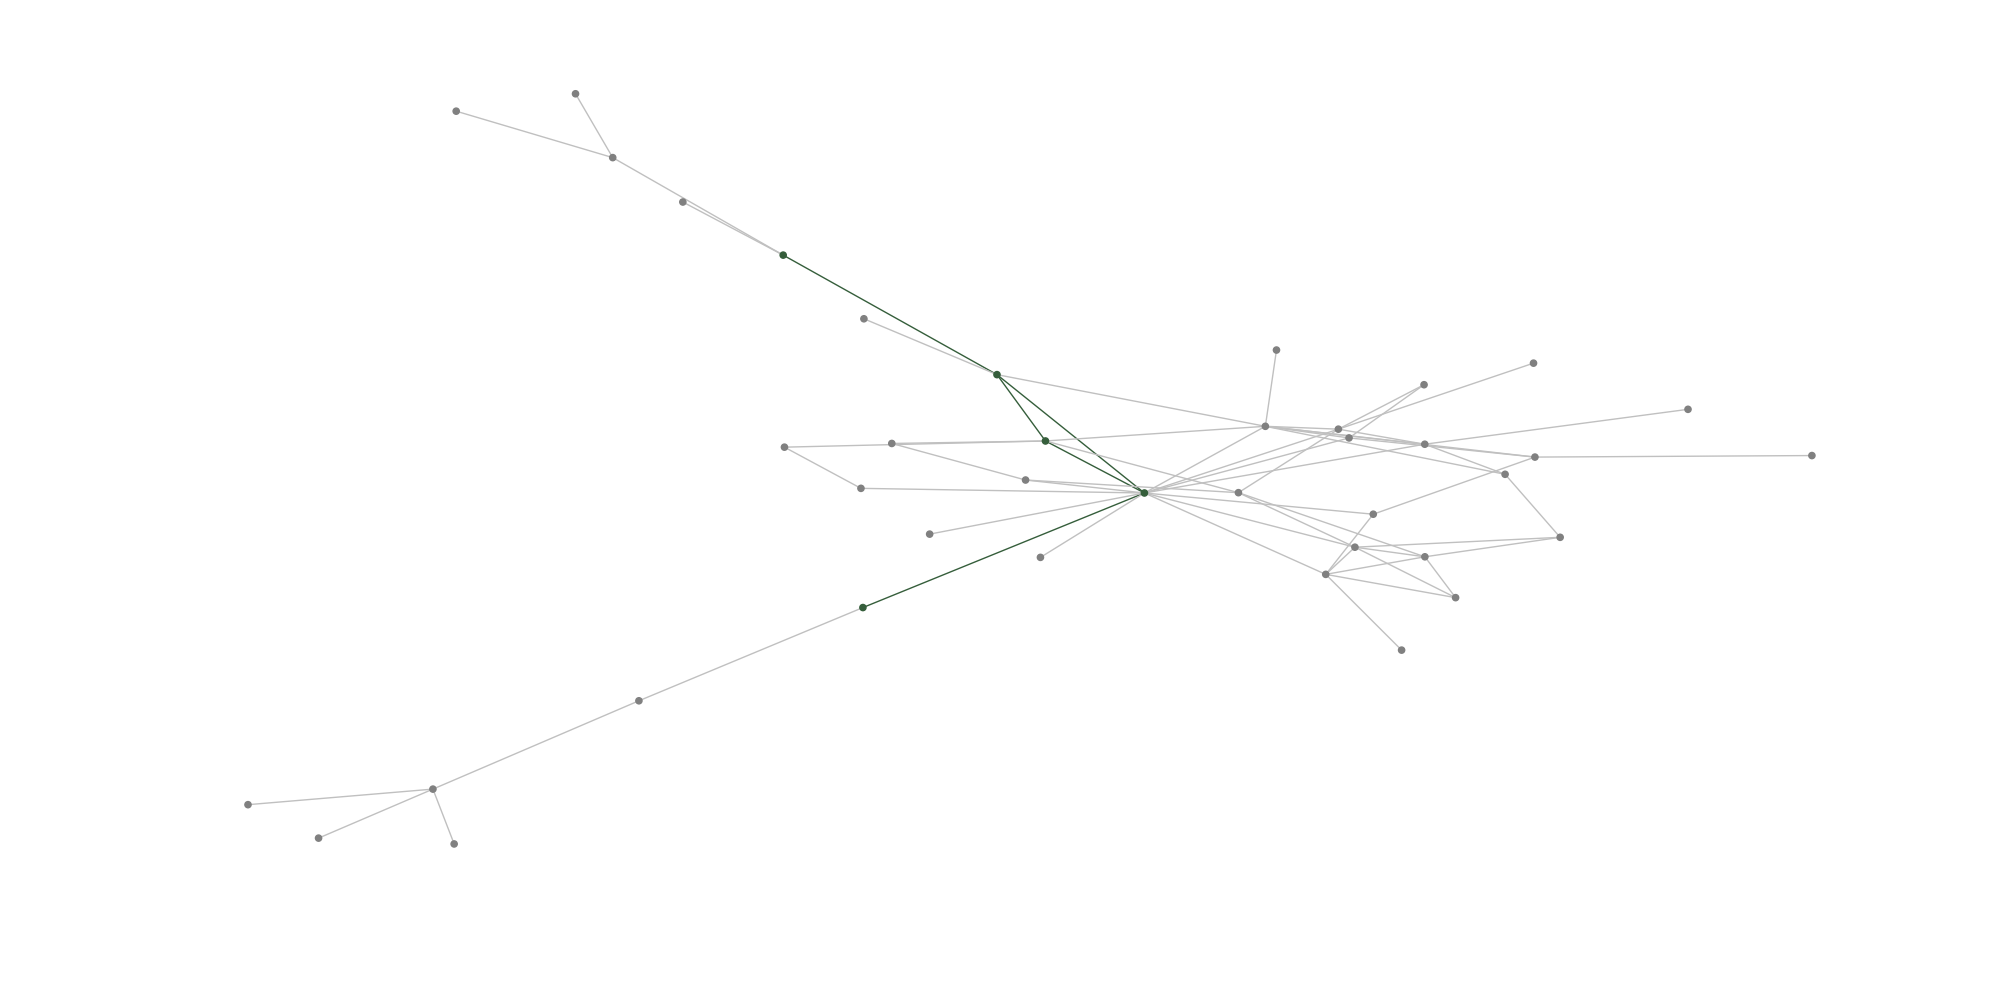

In [31]:
print("Node colour: " + str(no_inf5[2])+ " adopters at time t=5 (red)")
Image(filename=pta + "mchobololo_diffusion_3_5.png",  width = "400")

In [32]:
#print(df_st.info())
#Vertex attributes
df_vdiff = pd.DataFrame.from_dict(dict(G_nxu_1.nodes(data=True)), orient='index')
df_vdiff.info()
df_vdiff.to_csv(pta + "mchobololo_vdiff.csv", sep=";",encoding='utf-8',  index=False)

#Edge attributes
#df_ecomm.to_csv(pta + "protea_ecomm.csv", sep=";",encoding='utf-8',  index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40 non-null     object 
 1   degree         40 non-null     int64  
 2   kcore          40 non-null     int64  
 3   community      40 non-null     int64  
 4   community_op   40 non-null     int64  
 5   hex_op         40 non-null     object 
 6   _igraph_index  40 non-null     int64  
 7   it0            40 non-null     int64  
 8   it1            40 non-null     float64
 9   it2            40 non-null     float64
 10  it3            40 non-null     float64
 11  it4            40 non-null     float64
 12  it5            40 non-null     float64
 13  it6            40 non-null     float64
 14  it00           40 non-null     float64
 15  it01           40 non-null     float64
 16  it02           40 non-null     float64
 17  it03           40 non-null     float64
 18  it04        

#### 4. SUMMARY



In this section, we use group partitioning and clustering methods to identify densely connected groups and communities present in the Mchobololo community network. We also simulate multiple diffusion processes and make inferences about the groups and people that have the potential to effectively spread information and incite widespread adoption in the network.  

Using vertex partitioning techniques, we found this network to have at k-core = 3. We also detect 22 cliques with 3 or more nodes in them, the largest containing 4 nodes.

Next, when detecting subcommunities in the network, we found 5 communities with a modularity score of 0.5.  Comparing this to the louvain method, we find a high level of coincidence across the two (information scores > 0.7). However, modularity scores of the detected communities register below 0.7, which shows signs of weakly partitioned groups. This basically means that the method was not able to achieve very well defined or distinct groups or clusters. 

Finally, to explore the link between community cohesion and diffusion, I examine the outcome of diffusion using randomly selected nodes as first adopters. I trace and plot the adoption trend and visualise the spread at specific iteration points. Starting with 10% of the network as adopters, the diffusion process will on average reach roughly between 20% and 25% of the population in 5 steps. When we change the first adopters to people who have high values of centrality, we find a similar average outcome after 5 steps except in the *betweenness* simulation where less nodes in total are reached. Another discrepancy is that diffussion lasts shorter and diminishes much faster when initial adopters are central figures. The *degree* and *coreness* simulations seem to also indicate a possible containment or exclusion of outside nodes as the diffussion starts to reach less outside nodes.

This excercise in diffusion mechanics shows two main things: (i) the identification of key people is useful in promoting the adoption of a new idea or behaviour within and across communities, especially when the considering the rate or speed of diffusion, and (ii) core communities or groups can act as a social containment mechanism that are less permeable and confine the spread to certain types of people or groups.